<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-librairies" data-toc-modified-id="Import-librairies-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import librairies</a></span></li><li><span><a href="#Convert-ubyte-to-npy" data-toc-modified-id="Convert-ubyte-to-npy-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convert ubyte to npy</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Comparaison-grad" data-toc-modified-id="Comparaison-grad-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Comparaison grad</a></span></li><li><span><a href="#Training-loop-1-layer-1-image" data-toc-modified-id="Training-loop-1-layer-1-image-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Training loop 1 layer 1 image</a></span></li><li><span><a href="#Training-loop-1-layer-all-images" data-toc-modified-id="Training-loop-1-layer-all-images-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Training loop 1 layer all images</a></span></li><li><span><a href="#Training-loop-2-layer-1-image" data-toc-modified-id="Training-loop-2-layer-1-image-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Training loop 2 layer 1 image</a></span></li><li><span><a href="#Exemple" data-toc-modified-id="Exemple-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Exemple</a></span></li><li><span><a href="#New-model" data-toc-modified-id="New-model-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>New model</a></span><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Training-loop" data-toc-modified-id="Training-loop-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Training loop</a></span></li><li><span><a href="#Class-definition" data-toc-modified-id="Class-definition-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Class definition</a></span></li><li><span><a href="#Model" data-toc-modified-id="Model-10.4"><span class="toc-item-num">10.4&nbsp;&nbsp;</span>Model</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-10.5"><span class="toc-item-num">10.5&nbsp;&nbsp;</span>Test</a></span></li><li><span><a href="#Mini-batch" data-toc-modified-id="Mini-batch-10.6"><span class="toc-item-num">10.6&nbsp;&nbsp;</span>Mini-batch</a></span></li><li><span><a href="#No-regularization-no-dropout" data-toc-modified-id="No-regularization-no-dropout-10.7"><span class="toc-item-num">10.7&nbsp;&nbsp;</span>No regularization no dropout</a></span></li></ul></li><li><span><a href="#Test-MNIST-Fashion" data-toc-modified-id="Test-MNIST-Fashion-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Test MNIST Fashion</a></span></li></ul></div>

# Import librairies

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm.notebook import tqdm
plt.rcParams['figure.figsize'] = [17, 10]

# for IDX 
from glob import glob
import idx2numpy
import os 
"""
http://yann.lecun.com/exdb/mnist/
28*28 dimension 
training 60 000 sample
test 10 000 sample 
values between 0 and 255
1 file for data 1 file or label

"""

'\nhttp://yann.lecun.com/exdb/mnist/\n28*28 dimension \ntraining 60 000 sample\ntest 10 000 sample \nvalues between 0 and 255\n1 file for data 1 file or label\n\n'

In [109]:
os.getcwd()

'D:\\Users\\Premhx\\OneDrive - ENISE\\Master Spé ValDoM\\Cours\\Analyse Matricielle et Optimisation\\MNIST\\Fashion'

In [108]:
os.chdir(r"D:\Users\Premhx\OneDrive - ENISE\Master Spé ValDoM\Cours\Analyse Matricielle et Optimisation\MNIST\Fashion")

# Convert ubyte to npy

In [110]:
# convert idx to numpy and save to npy

files = glob("*-ubyte")
for file in files:
    data = idx2numpy.convert_from_file(file)
    np.save(file.split(".")[0], data)

In [111]:
# load all npy file and print shape
files = glob("*npy")

for file in files:
    data = np.load(file)
    print(file)
    print(data.shape)

t10k-images-idx3-ubyte.npy
(10000, 28, 28)
t10k-labels-idx1-ubyte.npy
(10000,)
train-images-idx3-ubyte.npy
(60000, 28, 28)
train-labels-idx1-ubyte.npy
(60000,)


# Load data

In [38]:
X_train = np.load("train-images.npy")
Y_train = np.load("train-labels.npy")

X_test = np.load("t10k-images.npy")
Y_test = np.load("t10k-labels.npy")

m_train = X_train.shape[0]
m_test = X_test.shape[0]

In [39]:
print("X_train shape: " + str(X_train.shape))
print("y_train shape: " + str(Y_train.shape))
print("X_test shape: " + str(X_test.shape))
print("y_test shape: " + str(Y_test.shape))
print("Number of training examples: m_train = " + str(m_train))
print("Number of testing examples: m_test = " + str(m_test))

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)
Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000


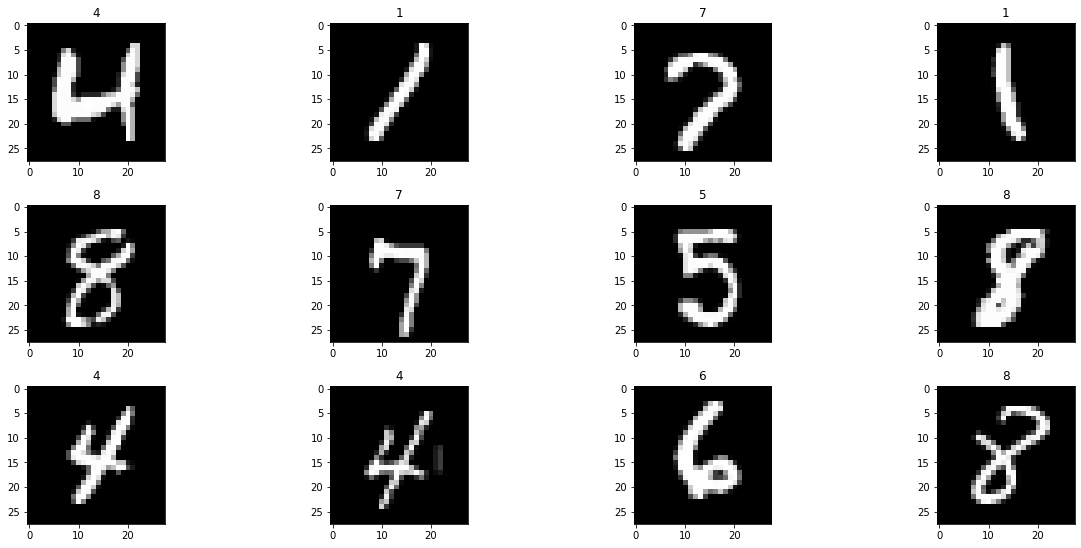

In [41]:
# random check with nine training examples
np.random.seed(0)
indices = list(np.random.randint(m_train, size=12))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[indices[i]].reshape(28, 28),
               cmap='gray', interpolation='none')
    plt.title(Y_train[indices[i]])
    plt.tight_layout()

In [42]:
# reshape to one dimension array (784 from 28*28)
X_train = X_train.reshape(m_train, -1)
X_test = X_test.reshape(m_test, -1)

# convert from 0 - 255 to 0-1
X_train = X_train/255
X_test = X_test/255

In [43]:
print(X_test.shape)
print(X_train.shape)

(10000, 784)
(60000, 784)


In [45]:
Y_train[0]

5

# Functions

In [46]:
def get_one_hot(targets, nb_classes=10):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

# def softmax(y):
#     s = np.exp(y)
# #     total = np.sum(s, axis=1).reshape(-1,1)
#     total = np.sum(s, axis=1)
#     return (s / total).reshape(-1,1)


def softmax(y):
    u = np.ones((y.shape[0], 1))
    S = np.exp(y)/(u.T.dot(np.exp(y)))
    return S

# def cross_entropy(y,S):
#     return -get_one_hot(y).T.dot(np.log(S))


def cross_entropy(y, S):
    return -y.T.dot(np.log(S))


def func(w):
    y = w.dot(x)
    S = softmax(y)
    P = get_one_hot(label).reshape(10, 1)
    loss = cross_entropy(P, S)
    grad = -np.reshape(-u.T.dot(P)*S.dot(x.T)+P.dot(x.T), (10*784, 1))
    return loss, grad


def sigmoid(x):
    return 1/(1 + np.exp(-x))


def compute_loss(Y, Y_hat):
    """
    compute loss function
    """
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1./m) * L_sum

    return L


def softmax_grad(x):
    # Reshape the 1-d softmax to 2-d so that np.dot will do the matrix multiplication
    s = softmax(x).reshape(-1, 1)
    return np.diagflat(s) - np.dot(s, s.T)

In [47]:
x = X_test[0].reshape(-1, 1)
label = Y_test[0]
w1 = np.random.rand(10, 28*28)

In [48]:
y = w1.dot(x)

In [49]:
# S= softmax(y)
S = sigmoid(y)
S

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [50]:
P = get_one_hot(label).reshape(10, 1)
loss = cross_entropy(P, S)
loss

array([[6.66133815e-16]])

In [51]:
u = np.ones((10, 1))

grad = -np.reshape(-u.T.dot(P)*S.dot(x.T)+P.dot(x.T), (10*784, 1))

In [52]:
grad.shape

(7840, 1)

In [53]:
grad

array([[-0.],
       [-0.],
       [-0.],
       ...,
       [-0.],
       [-0.],
       [-0.]])

In [54]:
softmax_grad(x).shape

(784, 784)

# Comparaison grad

In [55]:
d = np.random.rand(10, 28*28)
d = d/np.linalg.norm(d)
ep = 1e-8
learning_rate = 1e-2

In [56]:
(func(w1+ep*d)[0]-func(w1)[0])/ep

array([[0.130093]])

In [57]:
# gradient of the loss
func(w1)[1].T.dot(d.reshape(7840))

array([0.13009269])

In [58]:
# difference between grad and
(func(w1+ep*d)[0]-func(w1)[0])/ep - func(w1)[1].T.dot(d.reshape(7840))

array([[3.09527785e-07]])

In [59]:
# update weights
(w1.reshape(7840, 1)-learning_rate*func(w1)[1]).reshape(10, 784)

array([[0.43758721, 0.891773  , 0.96366276, ..., 0.07535907, 0.424663  ,
        0.10761771],
       [0.56821759, 0.24655694, 0.59643307, ..., 0.72239152, 0.31763187,
        0.32895376],
       [0.01969164, 0.04087486, 0.25782169, ..., 0.32427288, 0.92462281,
        0.97478726],
       ...,
       [0.89605225, 0.87767408, 0.17908352, ..., 0.19298211, 0.97002278,
        0.82518232],
       [0.92972355, 0.52315373, 0.74774185, ..., 0.86042083, 0.86936893,
        0.15739585],
       [0.46733265, 0.89456366, 0.7299262 , ..., 0.58888929, 0.39610152,
        0.42369213]])

# Training loop 1 layer 1 image  

Epoch 0 cost:  [4.12447156]
Epoch 50 cost:  [0.02069854]
Epoch 100 cost:  [0.01001389]
Epoch 150 cost:  [0.00661884]
Epoch 200 cost:  [0.00494907]
Epoch 250 cost:  [0.00395512]
True label  9
Predicted label  9  at  0.9967


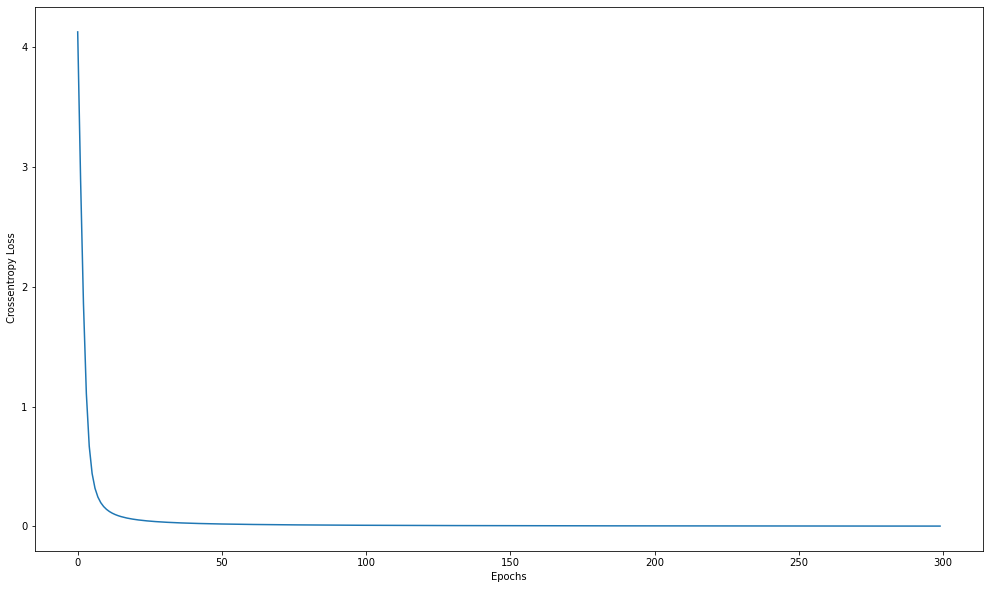

In [65]:
test = 12
x = X_test[test].reshape(-1, 1)
label = Y_test[test]
w1 = np.random.rand(10, 28*28)
u = np.ones((10, 1))
P = get_one_hot(label).reshape(10, 1)
learning_rate = 1e-2
epochs = 300

loss_epoch = []
accuracy_epoch = []

for i in range(epochs):
    y = w1.dot(x)
    S = softmax(y)
    loss = cross_entropy(P, S).reshape(-1)
    loss_epoch.append(loss) c  
    grad = -np.reshape(-u.T.dot(P)*S.dot(x.T)+P.dot(x.T), (10*784, 1))
    w1 = (w1.reshape(7840, 1)-learning_rate*grad).reshape(10, 784)
    if (i % 50 == 0):
        print("Epoch", i, "cost: ", loss)

plt.plot(range(epochs), loss_epoch)
plt.ylabel(" Crossentropy Loss")
plt.xlabel("Epochs")

print("True label ", label)
print('Predicted label ', np.argmax(S), " at ", round(np.max(S), 4))

In [84]:
test = np.random.randint(0, Y_test.shape[0])
y = w1.dot(X_test[test].reshape(-1, 1))
S = softmax(y)
print("True label ", Y_test[test])
print('Predicted label ', np.argmax(S), " at ", round(np.max(S), 4))

True label  4
Predicted label  0  at  nan


<ipython-input-46-1fcd0dcd39e9>:14: RuntimeWarning: overflow encountered in exp
  S = np.exp(y)/(u.T.dot(np.exp(y)))
<ipython-input-46-1fcd0dcd39e9>:14: RuntimeWarning: invalid value encountered in true_divide
  S = np.exp(y)/(u.T.dot(np.exp(y)))


In [85]:
# accuracy on all data
y = w1.dot(X_test.T)
S = softmax(y)


print('training accuracy: %.2f' % (np.mean(S == get_one_hot(Y_test))))

training accuracy: 0.00


<ipython-input-46-1fcd0dcd39e9>:14: RuntimeWarning: overflow encountered in exp
  S = np.exp(y)/(u.T.dot(np.exp(y)))
<ipython-input-46-1fcd0dcd39e9>:14: RuntimeWarning: invalid value encountered in true_divide
  S = np.exp(y)/(u.T.dot(np.exp(y)))
<ipython-input-85-fa881833c7cd>:6: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print('training accuracy: %.2f' % (np.mean(S == get_one_hot(Y_test))))


In [69]:
params = {"x": x, "w1": w1, "y": y, "S": S, "loss": loss, "grad": grad}
for p in params.keys():
    print(f'{ p:-<20} {params.get(p).shape}')

x------------------- (784, 1)
w1------------------ (10, 784)
y------------------- (10, 10000)
S------------------- (10, 10000)
loss---------------- (1,)
grad---------------- (7840, 1)


In [392]:
params.get('x').shape

(784, 1)

# Training loop 1 layer all images

In [431]:
x = X_test.T
w1 = np.random.rand(10, 28*28)
P = get_one_hot(y_test)
u = np.ones((x.shape[0], 1))

learning_rate = 1e-3
epochs = 2

loss_epoch = []
for i in range(epochs):
    y = w1.dot(x)
    S = softmax(y)
    loss = cross_entropy(P.T, S).reshape(-1).mean()
    loss_epoch.append(loss)
    grad = -np.reshape(-u.T.dot(P)*S.dot(x.T)+P.dot(x.T), (10*784, 1))
    w1 = (w1.reshape(7840, 1)-learning_rate*grad).reshape(10, 784)
    if (i % 50 == 0):
        print("Epoch", i, "cost: ", loss)

plt.plot(range(epochs), loss_epoch)
plt.ylabel(" Crossentropy Loss")
plt.xlabel("Epochs")

ValueError: shapes (1,784) and (10000,10) not aligned: 784 (dim 1) != 10000 (dim 0)

In [ ]:
params = {"x": x, "w1": w1, "y": y, "S": S, "loss": loss, "grad": grad}
for p in params.keys():
    print(f'{ p:-<20} {params.get(p).shape}')

In [409]:
x.dot(w1.T).shape

ValueError: shapes (784,10000) and (784,10) not aligned: 10000 (dim 1) != 784 (dim 0)

In [408]:
w1.dot(x).shape

(10, 10000)

In [343]:
(-u.T.dot(P)).shape

(1, 10)

Loss function value:  25118.98589909372    epoch  0


<ipython-input-340-6bb414972d97>:18: RuntimeWarning: overflow encountered in exp
  expA = np.exp(A)
<ipython-input-340-6bb414972d97>:19: RuntimeWarning: invalid value encountered in true_divide
  return expA / expA.sum(axis=1, keepdims=True)
<ipython-input-340-6bb414972d97>:77: RuntimeWarning: divide by zero encountered in log
  loss = np.sum(-one_hot_labels*( np.log(ao)))
<ipython-input-340-6bb414972d97>:77: RuntimeWarning: invalid value encountered in multiply
  loss = np.sum(-one_hot_labels*( np.log(ao)))


Loss function value:  nan    epoch  10
Loss function value:  nan    epoch  20
Loss function value:  nan    epoch  30
Loss function value:  nan    epoch  40



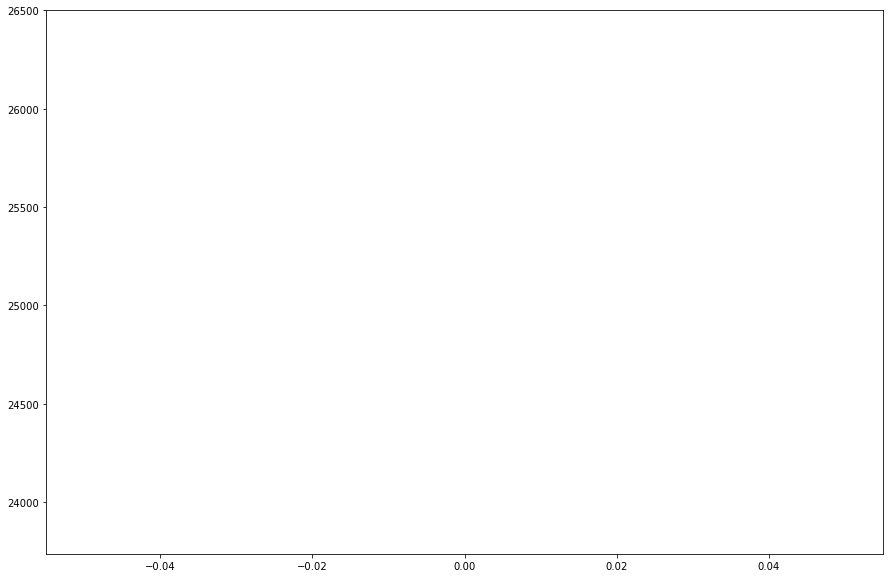

In [340]:
import numpy as np
import matplotlib.pyplot as plt


feature_set = X_test

one_hot_labels = get_one_hot(y_test)


def sigmoid(x):
    return 1/(1+np.exp(-x))


def sigmoid_der(x):
    return sigmoid(x) * (1-sigmoid(x))


def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)


instances = feature_set.shape[0]
attributes = feature_set.shape[1]
hidden_nodes = 256
output_labels = 10

wh = np.random.rand(attributes, hidden_nodes)
wh = wh/np.linalg.norm(wh)
bh = np.random.randn(hidden_nodes)

wo = np.random.rand(hidden_nodes, output_labels)
wo = wo/np.linalg.norm(wo)
bo = np.random.randn(output_labels)
lr = 10e-2

error_cost = []
epochs = 50
for epoch in tqdm(range(epochs)):
    # feedforward

    # Phase 1
    zh = np.dot(feature_set, wh) + bh
    ah = sigmoid(zh)

    # Phase 2
    zo = np.dot(ah, wo) + bo
    ao = softmax(zo)

# Back Propagation

# Phase 1

    dcost_dzo = ao - one_hot_labels
    dzo_dwo = ah

    dcost_wo = np.dot(dzo_dwo.T, dcost_dzo)

    dcost_bo = dcost_dzo

# Phases 2

    dzo_dah = wo
    dcost_dah = np.dot(dcost_dzo, dzo_dah.T)
    dah_dzh = sigmoid_der(zh)
    dzh_dwh = feature_set
    dcost_wh = np.dot(dzh_dwh.T, dah_dzh * dcost_dah)

    dcost_bh = dcost_dah * dah_dzh

    # Update Weights ================

    wh -= lr * dcost_wh
    bh -= lr * dcost_bh.sum(axis=0)

    wo -= lr * dcost_wo
    bo -= lr * dcost_bo.sum(axis=0)

    loss = np.sum(-one_hot_labels*(np.log(ao)))
    error_cost.append(loss)

    if epoch % 10 == 0:
        print('Loss function value: ', loss, "   epoch ", epoch)

plt.plot(np.arange(epochs), error_cost)
plt.show()

In [330]:
-one_hot_labels*np.log(ao)

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [337]:
zh

array([[36.29347466, 35.66071538, 34.20139489, ..., 33.94791415,
        32.25699799, 33.35849261],
       [55.31446388, 51.27608485, 60.81968247, ..., 54.71700232,
        57.00169449, 61.71617672],
       [18.32934104, 18.79067538, 19.008868  , ..., 17.76277782,
        18.32592671, 21.2256703 ],
       ...,
       [58.24813724, 59.74514218, 52.97366117, ..., 53.94930203,
        49.26947149, 58.08220919],
       [51.95472135, 52.99726214, 52.59957206, ..., 47.81280683,
        49.82427037, 53.76367234],
       [84.04940269, 83.6231659 , 82.69099101, ..., 80.53678013,
        73.73571765, 87.21477195]])

# Training loop 2 layer 1 image

In [423]:
test = 12
x = X_test[test].reshape(-1, 1)
label = y_test[test]
w1 = np.random.rand(256, 28*28)
w2 = np.random.rand(10, 256)

u = np.ones((10, 1))
P = get_one_hot(label).reshape(10, 1)
learning_rate = 1e-2
epochs = 200

loss_epoch = []
for i in range(epochs):
    # layer 1
    y1 = w1.dot(x)
    S1 = sigmoid(y1)

    # layer 2
    y2 = w2.dot(S1)
    S2 = softmax(y2)

    # loss
    loss = cross_entropy(P, S).reshape(-1)
    loss_epoch.append(loss)
    grad1 = -np.reshape(-u.T.dot(P)*S.dot(x.T)+P.dot(x.T), (10*784, 1))
    grad2 = -np.reshape(-u.T.dot(P)*S.dot(x.T)+P.dot(x.T), (10*784, 1))
    w1 = (w1.reshape(256*784, 1)-learning_rate*grad1).reshape(256, 784)
    w2 = (w2.reshape(2560, 1)-learning_rate*grad2).reshape(10, 256)

    if (i % 50 == 0):
        print("Epoch", i, "cost: ", loss)

plt.plot(range(epochs), loss_epoch)
plt.ylabel(" Crossentropy Loss")
plt.xlabel("Epochs")

print("True label ", label)
print('Predicted label ', np.argmax(S), " at ", round(np.max(S), 4))

ValueError: operands could not be broadcast together with shapes (200704,1) (7840,1) 

# Exemple

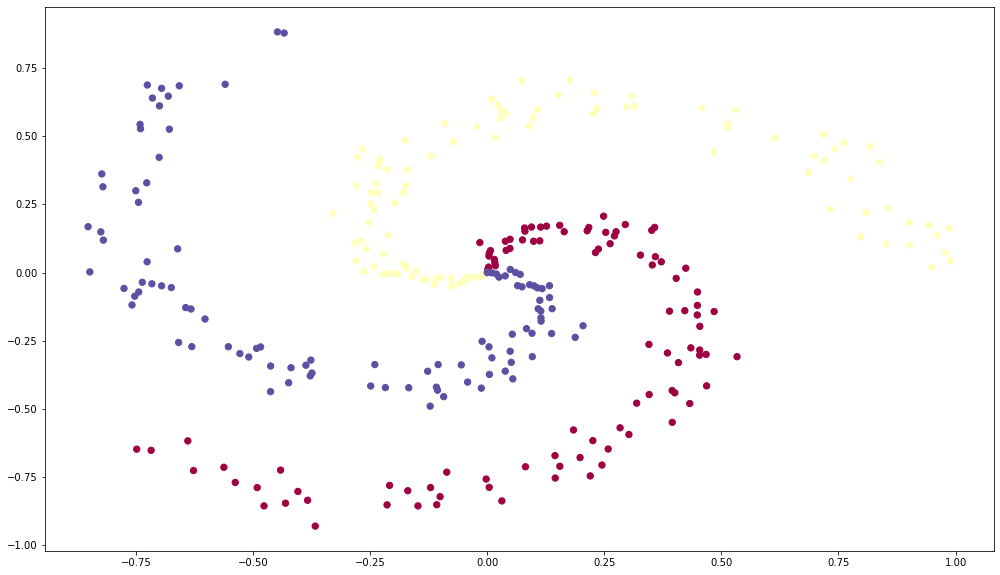

In [586]:
# ,kl,
N = 100  # number of points per class
D = 2  # dimensionality
K = 3  # number of classes
X = np.zeros((N*K, D))  # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8')  # class labels
for j in range(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0, 1, N)  # radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2  # theta
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [649]:
Y_train[5512:5560]

array([0, 4, 0, 5, 1, 6, 9, 7, 1, 8, 9, 9, 6, 0, 5, 1, 2, 2, 1, 3, 9, 4,
       8, 7, 8, 8, 9, 9, 7, 0, 3, 1, 9, 2, 7, 3, 8, 4, 5, 5, 1, 6, 6, 7,
       6, 8, 9, 9], dtype=uint8)

iteration 0: loss 1.098538
iteration 1000: loss 0.661623
iteration 2000: loss 0.541892
iteration 3000: loss 0.380436



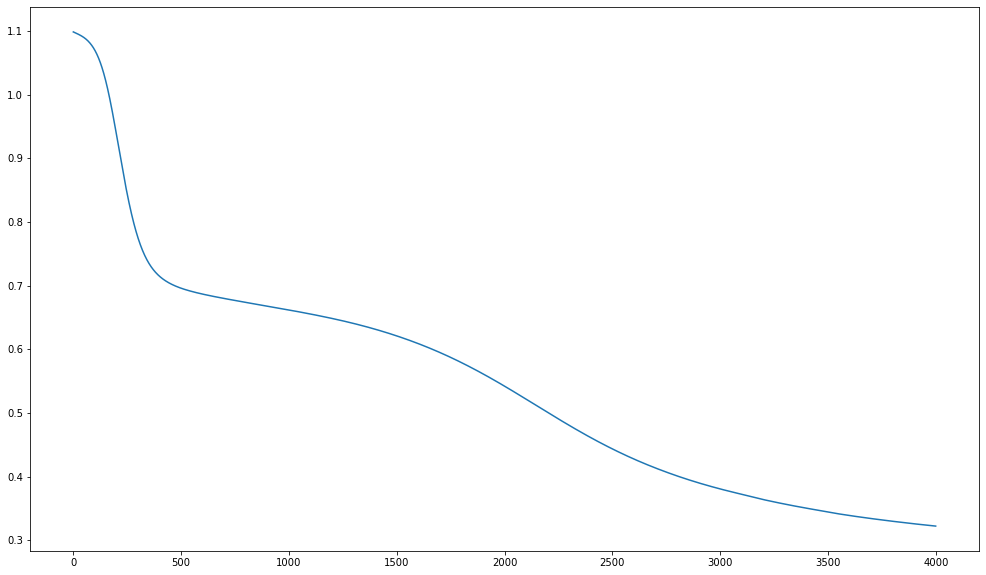

In [595]:
# initialize parameters randomly
h = 512  # size of hidden layer
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))

epochs = 4000
# some hyperparameters
step_size = 1e-1
reg = 1e-3  # regularization strength
train_loss = np.zeros(epochs)
# gradient descent loop
num_examples = X.shape[0]


for i in tqdm(range(epochs)):

    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b)  # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2

    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)  # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    train_loss[i] = loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2


plt.plot(range(epochs), train_loss)
plt.show()

In [594]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.91


# New model

In [253]:
# Based on  CS231n
# initialize parameters randomly
np.random.seed(0)

D = 28*28  # dimensionality
K = 10  # number of classes
h = 200  # size of hidden layer
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))


X = X_train.reshape(-1,28*28)
y = Y_train
epochs = 100
# some hyperparameters
learning_rate = 1e-3
reg = 1e-3  # regularization strength

train_loss = np.zeros(epochs)
train_accuracy = np.zeros(epochs)

# gradient descent loop
num_examples = X.shape[0]
eps=1e-8


for i in tqdm(range(epochs)):

    # evaluate class scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b)  # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2

    # accuracy 
    predicted_class = np.argmax(scores, axis=1)
    train_accuracy[i]=(np.mean(predicted_class == y))
    # compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) +eps # [N x K]

    # compute the loss: average cross-entropy loss and regularization
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
    loss = data_loss + reg_loss
    train_loss[i] = loss
    if i % (epochs/20) == 0:
        print("iteration %d: loss %f" % (i, loss))

    # compute the gradient on scores
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples

    # backpropate the gradient to the parameters
    # first backprop into parameters W2 and b2
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = np.dot(dscores, W2.T)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    # perform a parameter update
    W += -learning_rate * dW
    b += -learning_rate * db
    W2 += -learning_rate * dW2
    b2 += -learning_rate * db2


plt.plot(range(epochs), train_loss,label="train loss")
# plt.plot(range(epochs), train_accuracy,label="train accuracy")

plt.legend()
plt.show()

In [121]:
hidden_layer = np.maximum(0, np.dot(X, W) + b)  # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.91


In [675]:
hidden_layer = np.maximum(0, np.dot(X_test.reshape(-1,28*28), W) + b)  # note, ReLU activation
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training test: %.2f' % (np.mean(predicted_class == Y_test)))

training test: 0.92


In [692]:
dscores = probs
dscores[range(num_examples), y] -= 1
dscores /= num_examples
dscores.shape

(60000, 10)

In [693]:
grad(probs,y,num_examples).shape

(60000, 10)

In [683]:
y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## Functions

In [117]:
def relu(x):
    """
    Relu activation function 
    return : relu output (max(0,x))
    """
    return np.maximum(0, x)


# def feedforward(X, W, b):
#     """
#     1 feedforward
#     return : output layer
#     """
#     return np.dot(X, W)+b

def feedforward(X, W, b, dropout=2):
    """
    1 feedforward
    return : output layer 
    """
    if dropout < 2:
        mask = (np.random.rand(W.shape[0], W.shape[1]) > dropout)
        W = W*mask
        return np.dot(X, W)+b
    else:
        return np.dot(X, W)+b


def predict(X, W, b, W2, b2):
    """
    Prediction
    return : predicted_class,probability
    """

    hidden_layer = relu(feedforward(X, W, b))
    scores = softmax(feedforward(hidden_layer, W2, b2), eps)
    predicted_class = np.argmax(scores, axis=1)
    probability = np.max(scores)

    return predicted_class, probability


def get_accuracy(scores, y):
    """
    Compute accuracy after feedforward
    return : accuracy (0 to 1)
    """
    predict_class = np.argmax(scores, axis=1)
    return np.mean(predict_class == y)


def softmax(scores, eps):
    """
    Compute class probabilities by softmax
    return : sofwtmax output (probabilities)
    """
    exp = np.exp(scores)
    probs = exp/np.sum(exp, axis=1, keepdims=True)+eps
    return probs


def cross_entropy(probs, y, num_examples, W1, W2, reg):
    """
    Compute the loss: average cross-entropy loss and regularization
    return : cross_entropy loss
    """
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W1*W1)+0.5*reg*np.sum(W2*W2)
    loss = data_loss+reg_loss
    return loss


def grad(probs, y, num_examples):
    """
    Compute the gradient on scores
    return : dscores
    """
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    return dscores


def backpropagation(hidden_layer, dscores, W2, W, X, reg):
    """
    backpropate the gradient to the parameters
    return : dW,db,dW2,db2
    """
    # first backprop into parameters W2 and b2
    dW2 = feedforward(hidden_layer.T, dscores, b=0)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = feedforward(dscores, W2.T, b=0)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = feedforward(X.T, dhidden, b=0)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    return dW, db, dW2, db2


def updates(W, b, W2, b2, dW, db, dW2, db2, learning_rate):
    """
    updates the weights 
    return : W,b,W2,b2
    """
    W += -learning_rate * dW
    b += -learning_rate * db
    W2 += -learning_rate * dW2
    b2 += -learning_rate * db2

    return W, b, W2, b2


def img_pred(x, W, b, W2, b2):
    """
    Compute the prediction for one image 'x'
    Open x, reshape and use predict method
    return : predicted_class,probability
    """
    img = invert(cv2.imread(x, 0))
#     img = img/255
    plt.imshow(img, cmap="gray")
    return predict(img.reshape(-1, 28*28), W, b, W2, b2)


def predict_time(known_epoch, known_min, known_sec, wanted_epoch):
    """
    Given the time taken to complete N epochs, compute the time M epochs will take
    return : XX min and XX sec 
    """
    total_sec = known_sec+known_min*60
    ratio = total_sec/known_epoch
    secondes = wanted_epoch*ratio
    minutes = secondes//60
    secondes = secondes % 60
    return f'{int(minutes)} min and {int(secondes)} sec for {wanted_epoch} epochs'


def invert(img):
    """
    Invert b&w image (white background to black)
    return : image
    """
    output = -img+255
    return output


def loss_curve(epochs, train_loss, test_loss, return_fig=False):
    """
    Plot the learning curve for the loss
    return : plot or fig 
    """
    fig1, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(range(epochs), train_loss, label="train loss")
    ax1.plot(range(epochs), test_loss, label="test loss", color='red')
    ax2.plot(range(epochs), np.abs(train_loss-test_loss),
             label="Loss diff", color='green')

    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('train loss')
    ax1.set_ylabel('test loss')
    ax2.set_ylabel('Loss diff')
    ax1.set_yscale('log')
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc=0)
    if return_fig:
        return fig1
    else:
        return


def accuracy_curve(epochs, train_accuracy, test_accuracy, return_fig=False):
    """
    Plot the learning curve for the accuracy
    return : plot or fig 
    """
    fig1, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(range(epochs), train_accuracy, label="Train accuracy")
    ax1.plot(range(epochs), test_accuracy, label="Test accuracy", color='red')
    ax2.plot(range(epochs), np.abs(train_accuracy-test_accuracy),
             label="Accuracy diff", color='green')

    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Train accuracy')
    ax1.set_ylabel('Test accuracy')
    ax2.set_ylabel('Accuracy diff')
    h1, l1 = ax1.get_legend_handles_labels()
    h2, l2 = ax2.get_legend_handles_labels()
    ax1.legend(h1+h2, l1+l2, loc=0)
    if return_fig:
        return fig1
    else:
        return

## Training loop

In [118]:
X_train = np.load("train-images.npy").reshape(-1,28*28)
Y_train = np.load("train-labels.npy")

X_test = np.load("t10k-images.npy").reshape(-1,28*28)
Y_test = np.load("t10k-labels.npy")

In [119]:
# initialize parameters randomly
np.random.seed(0)
D = 28*28  # dimensionality
K = 10  # number of classes
h = 512  # size of hidden layer
W = 0.01 * np.random.randn(D, h)
b = np.zeros((1, h))
W2 = 0.01 * np.random.randn(h, K)
b2 = np.zeros((1, K))


epochs = 300
# some hyperparameters
learning_rate = 1e-3
reg = 1e-3  # regularization strength

train_loss = np.zeros(epochs)
train_accuracy = np.zeros(epochs)
test_loss = np.zeros(epochs)
test_accuracy = np.zeros(epochs)

# gradient descent loop
num_examples = X_train.shape[0]
num_examples_test = X_test.shape[0]
eps = 1e-8


for i in tqdm(range(epochs)):
    
    dropout1 = (np.random.rand(W.shape[0], W.shape[1]) > 0.2)
    dropout2 = (np.random.rand(W2.shape[0], W2.shape[1]) > 0.2)

    # 1st layer + relu
    hidden_layer = relu(feedforward(X_train, W*dropout1, b,))

    # 2nd layer
    scores = feedforward(hidden_layer, W2*dropout2, b2,dropout=0.2)

    # softmax
    probs = softmax(scores, eps)

    # crossentropy loss
    loss = cross_entropy(probs, Y_train, num_examples, W, W2, reg)

    # logging loss
    train_loss[i] = loss
    
    # logging accuracy
    train_accuracy[i] = get_accuracy(scores, Y_train)
    
    # test set logging
    hidden_layer_test = relu(feedforward(X_test, W*dropout1, b))
    scores_test = feedforward(hidden_layer_test, W2*dropout2, b2)
    test_accuracy[i] = get_accuracy(scores_test, Y_test)

    probs_test = softmax(scores_test, eps)
    loss_test = cross_entropy(probs_test, Y_test, num_examples_test, W, W2, reg)
    test_loss[i] = loss_test

    # gradient
    dscores = grad(probs, Y_train, num_examples)

    # backpropagation
    dW, db, dW2, db2 = backpropagation(
        hidden_layer, dscores, W2, W, X_train, reg)

    # updates
    W, b, W2, b2 = updates(W, b, W2, b2, dW, db, dW2, db2, learning_rate)

    if i % (epochs/20) == 0:
        print(
            f"Epoch {i: <4}  train_loss : {round(train_loss[i],4): <9}  test_loss : {round(test_loss[i],4): <9}  train_accuracy : {round(train_accuracy[i],4): <9}  test_accuracy : {round(test_accuracy[i],4): <9}")

Epoch 0     train_loss : 4.7217     test_loss : 4.3512     train_accuracy : 0.0922     test_accuracy : 0.1253   
Epoch 15    train_loss : 0.957      test_loss : 0.8524     train_accuracy : 0.7034     test_accuracy : 0.733    
Epoch 30    train_loss : 0.9058     test_loss : 0.8573     train_accuracy : 0.7159     test_accuracy : 0.7395   



KeyboardInterrupt: 

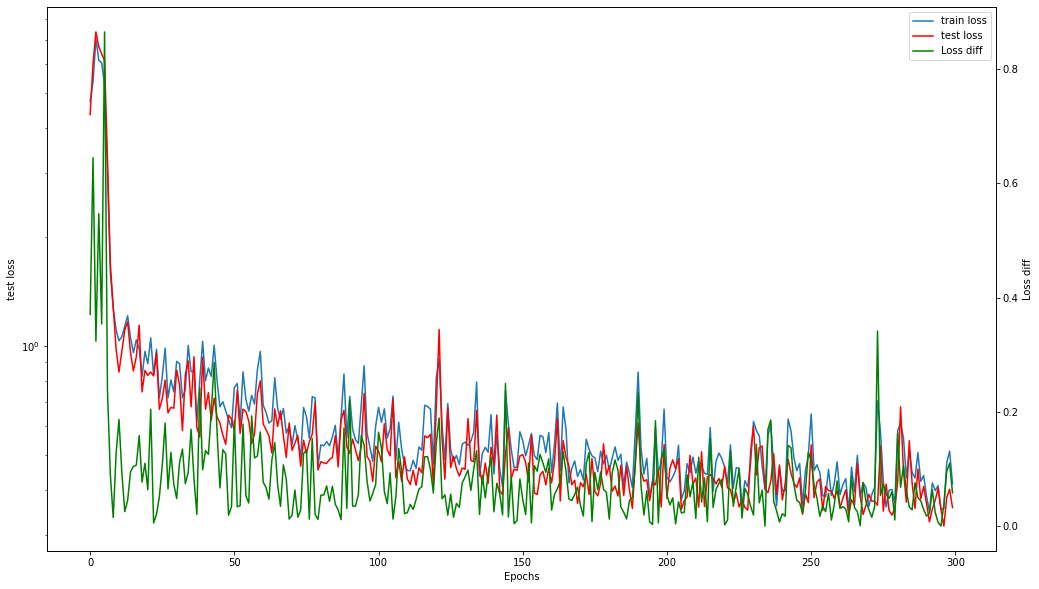

In [7]:
loss_curve(epochs,train_loss,test_loss)

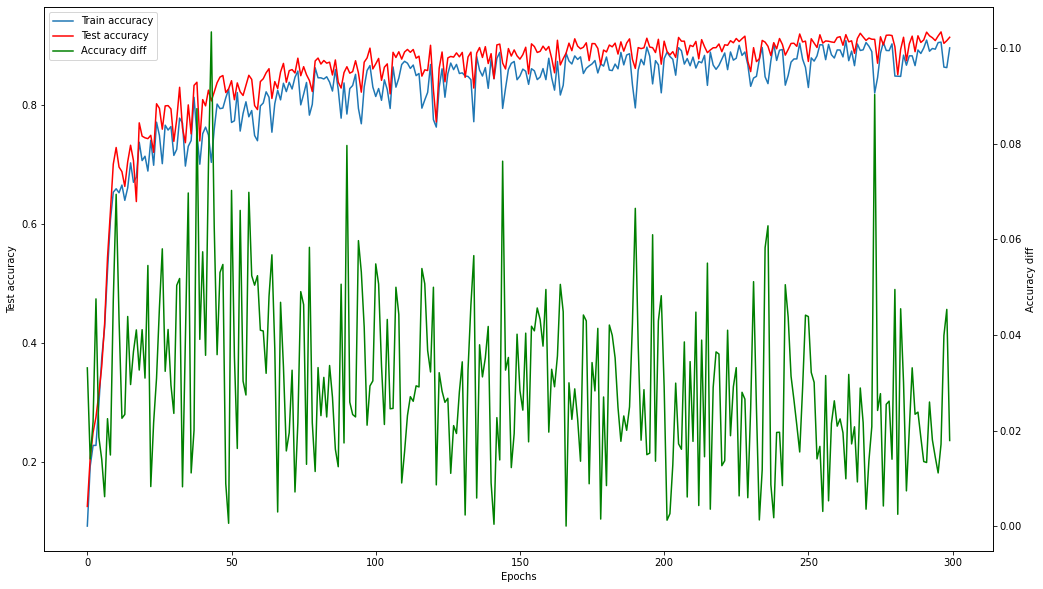

In [8]:
accuracy_curve(epochs,train_accuracy,test_accuracy)

(array([2], dtype=int64), 0.9999862359112884)

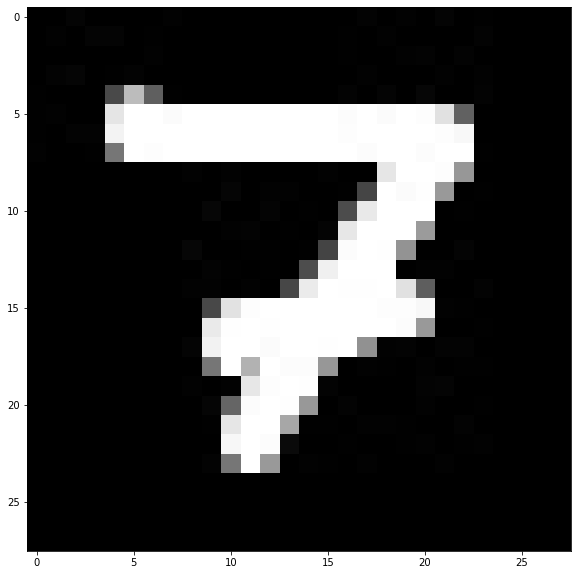

In [10]:
import cv2
img_pred("test.jpg",W,b,W2,b2)

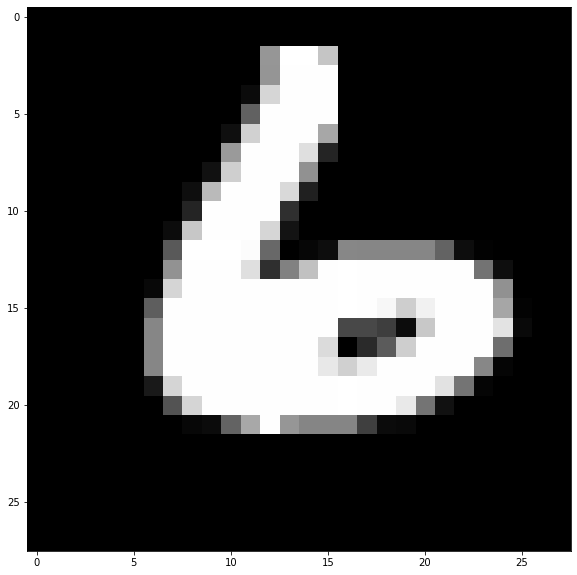

TypeError: softmax() takes 1 positional argument but 2 were given

In [87]:
for i in range(5):
    test=np.random.randint(0,X_test.shape[0])
    plt.imshow(X_test[test].reshape(28,28),cmap="gray")
    plt.show()
    pred,prob=predict(X_test[test],W,b,W2,b2)
    print(f"True label {Y_test[test]}  pred {pred}  prob {prob}")


## Class definition

In [2]:
class NN():
    def __init__(self, X_train, X_test, Y_train, Y_test, neurons, epochs, learning_rate, dropout=2, reg=1e-3, seed=0):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.neurons = neurons
        self.input_dim = 28*28
        self.ouput_dim = 10
        self.W = 0.01 * np.random.randn(self.input_dim, self.neurons)
        self.b = np.zeros((1, self.neurons))
        self.W2 = 0.01 * np.random.randn(self.neurons, self.ouput_dim)
        self.b2 = np.zeros((1, self.ouput_dim))
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.dropout = dropout
        self.reg = reg

        self.train_loss = np.zeros(self.epochs)
        self.train_accuracy = np.zeros(self.epochs)
        self.test_loss = np.zeros(self.epochs)
        self.test_accuracy = np.zeros(self.epochs)

        self.num_examples = self.X_train.shape[0]
        self.num_examples_test = self.X_test.shape[0]
        self.eps = 1e-8
        self.seed = seed

    def relu(x):
        """
        Relu activation function 
        return : relu output (max(0,x))
        """
        return np.maximum(0, x)

    def feedforward(X, W, b, dropout=2):
        """
        1 feedforward
        return : output layer 
        """
        if dropout < 2:
            mask = (np.random.rand(W.shape[0], W.shape[1]) > dropout)
            W = W*mask
            return np.dot(X, W)+b
        else:
            return np.dot(X, W)+b

    def get_accuracy(scores, y):
        """
        Compute accuracy after feedforward
        return : accuracy (0 to 1)
        """
        predict_class = np.argmax(scores, axis=1)
        return np.mean(predict_class == y)

    def softmax(scores, eps):
        """
        Compute class probabilities by softmax
        return : sofwtmax output (probabilities)
        """
        exp = np.exp(scores)
        probs = exp/np.sum(exp, axis=1, keepdims=True)+eps
        return probs

    def cross_entropy(probs, y, num_examples, W1, W2, reg):
        """
        Compute the loss: average cross-entropy loss and regularization
        return : cross_entropy loss
        """
        correct_logprobs = -np.log(probs[range(num_examples), y])
        data_loss = np.sum(correct_logprobs)/num_examples
        reg_loss = 0.5*reg*np.sum(W1*W1)+0.5*reg*np.sum(W2*W2)
        loss = data_loss+reg_loss
        return loss

    def grad(probs, y, num_examples):
        """
        Compute the gradient on scores
        return : dscores
        """
        dscores = probs
        dscores[range(num_examples), y] -= 1
        dscores /= num_examples
        return dscores

    def backpropagation(hidden_layer, dscores, W2, W, X, reg):
        """
        backpropate the gradient to the parameters
        return : dW,db,dW2,db2
        """
        # first backprop into parameters W2 and b2
        dW2 = feedforward(hidden_layer.T, dscores, b=0)
        db2 = np.sum(dscores, axis=0, keepdims=True)
        # next backprop into hidden layer
        dhidden = feedforward(dscores, W2.T, b=0)
        # backprop the ReLU non-linearity
        dhidden[hidden_layer <= 0] = 0
        # finally into W,b
        dW = feedforward(X.T, dhidden, b=0)
        db = np.sum(dhidden, axis=0, keepdims=True)

        # add regularization gradient contribution
        dW2 += reg * W2
        dW += reg * W

        return dW, db, dW2, db2

    def updates(W, b, W2, b2, dW, db, dW2, db2, learning_rate):
        """
        updates the weights 
        return : W,b,W2,b2
        """
        W += -learning_rate * dW
        b += -learning_rate * db
        W2 += -learning_rate * dW2
        b2 += -learning_rate * db2

        return W, b, W2, b2

    def predict(self, X):
        """
        Prediction
        return : predicted_class,probability
        """

        hidden_layer = relu(feedforward(X, self.W, self.b))
        scores = softmax(feedforward(hidden_layer, self.W2, self.b2), self.eps)
        predicted_class = np.argmax(scores, axis=1)
        probability = np.max(scores)

        return predicted_class, probability

    def img_pred(self, X):
        img = invert(cv2.imread(X, 0))
    #     img = img/255
        plt.imshow(img, cmap="gray")
        img = img.reshape(28*28)
        return self.predict(img)

    def predict_time(known_epoch, known_min, known_sec, wanted_epoch):
        total_sec = known_sec+known_min*60
        ratio = total_sec/known_epoch
        secondes = wanted_epoch*ratio
        minutes = secondes//60
        secondes = secondes % 60
        return f'{int(minutes)} min and {int(secondes)} sec for {wanted_epoch} epochs'

    def invert(img):
        output = -img+255
        return output

    def loss_curve(self, return_fig=False):
        fig1, ax1 = plt.subplots()

        ax2 = ax1.twinx()
        ax1.plot(range(self.epochs), self.train_loss, label="train loss")
        ax1.plot(range(self.epochs), self.test_loss,
                 label="test loss", color='red')
        ax2.plot(range(self.epochs), np.abs(self.train_loss-self.test_loss),
                 label="Loss diff", color='green')

        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('train loss')
        ax1.set_ylabel('test loss')
        ax2.set_ylabel('Loss diff')
        ax1.set_yscale('log')
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1+h2, l1+l2, loc=0)
        if return_fig:
            return fig1
        else:
            return

    def accuracy_curve(self, return_fig=False):
        fig1, ax1 = plt.subplots()

        ax2 = ax1.twinx()
        ax1.plot(range(self.epochs), self.train_accuracy,
                 label="Train accuracy")
        ax1.plot(range(self.epochs), self.test_accuracy,
                 label="Test accuracy", color='red')
        ax2.plot(range(self.epochs), np.abs(self.train_accuracy-self.test_accuracy),
                 label="Accuracy diff", color='green')

        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Train accuracy')
        ax1.set_ylabel('Test accuracy')
        ax2.set_ylabel('Accuracy diff')
        h1, l1 = ax1.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax1.legend(h1+h2, l1+l2, loc=0)
        if return_fig:
            return fig1
        else:
            return

    def save(self, name):
        return joblib.dump(self, name)

    def fit(self):
        np.random.seed(self.seed)
        for i in tqdm(range(self.epochs)):

            # 1st layer + relu
            hidden_layer = relu(feedforward(self.X_train, self.W, self.b, self.dropout))

            # 2nd layer
            scores = feedforward(hidden_layer, self.W2, self.b2, self.dropout)

            # softmax
            probs = softmax(scores, self.eps)

            # crossentropy loss
            loss = cross_entropy(probs, self.Y_train,
                                 self.num_examples, self.W, self.W2, self.reg)

            # logging loss
            self.train_loss[i] = loss

            # logging accuracy
            self.train_accuracy[i] = get_accuracy(scores, self.Y_train)

            # test set logging
            hidden_layer_test = relu(feedforward(self.X_test, self.W, self.b))
            probs_test = softmax(feedforward(hidden_layer_test, self.W2, self.b2), self.eps)
            self.test_accuracy[i] = get_accuracy(probs_test, self.Y_test)

            # probs_test = softmax(scores_test, self.eps)
            loss_test = cross_entropy(
                probs_test, self.Y_test, self.num_examples_test, self.W, self.W2, self.reg)
            self.test_loss[i] = loss_test

            # gradient
            dscores = grad(probs, self.Y_train, self.num_examples)

            # backpropagation
            dW, db, dW2, db2 = backpropagation(
                hidden_layer, dscores, self.W2, self.W, self.X_train, self.reg)

            # updates
            self.W, self.b, self.W2, self.b2 = updates(
                self.W, self.b, self.W2, self.b2, dW, db, dW2, db2, self.learning_rate)

            if i % (self.epochs/20) == 0:
                print(f"Epoch {i: <4}  train_loss : {round(self.train_loss[i],4): <9}  test_loss : {round(self.test_loss[i],4): <9}  train_accuracy : {round(self.train_accuracy[i],4): <9}  test_accuracy : {round(self.test_accuracy[i],4): <9}")

## Model

In [3]:
X_train = np.load("train-images.npy").reshape(-1,28*28)
Y_train = np.load("train-labels.npy")

X_test = np.load("t10k-images.npy").reshape(-1,28*28)
Y_test = np.load("t10k-labels.npy")


model=NN(X_train,X_test,Y_train,Y_test,neurons=512,epochs=30,learning_rate=1e-3,dropout=0.2)
model.fit()

NameError: name 'relu' is not defined

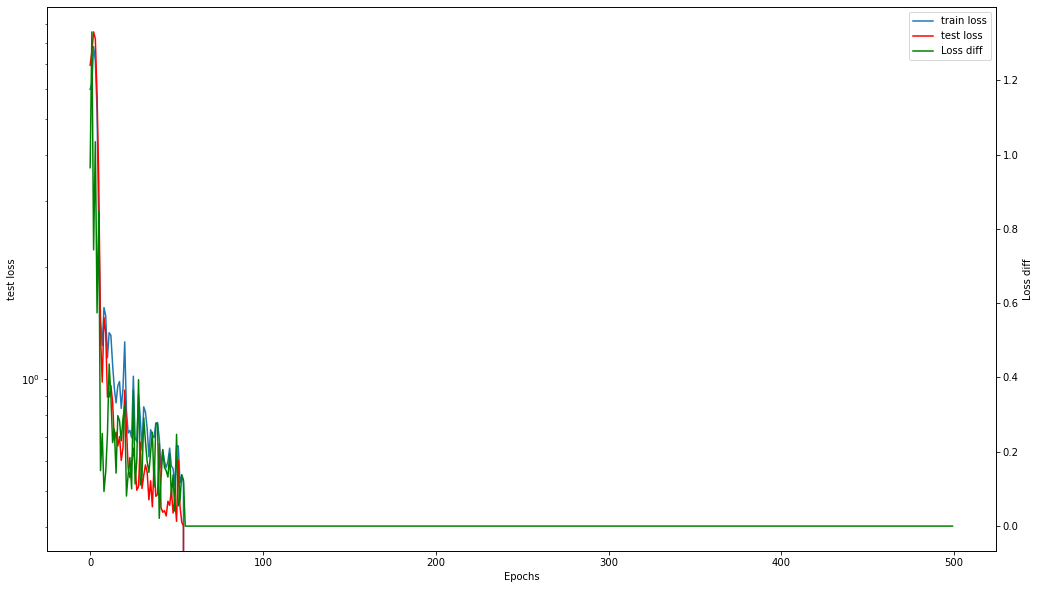

In [1308]:
model.loss_curve()

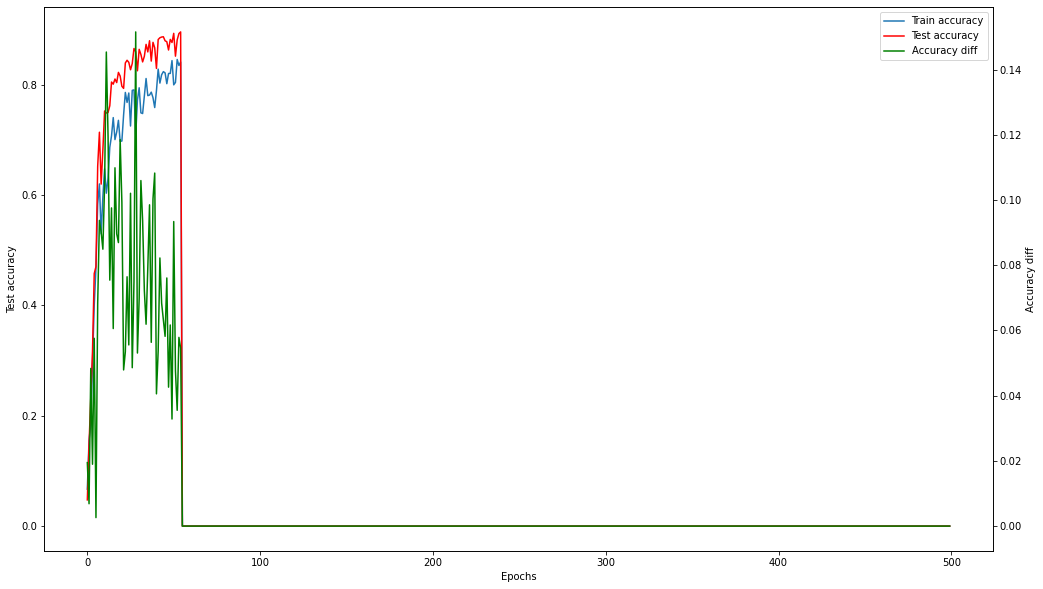

In [1309]:
model.accuracy_curve()

In [1310]:
print(Y_test[0])
model.predict(X_test[0])

7


(array([7], dtype=int64), 0.9999992444232619)

(array([8], dtype=int64), 0.5282760150807954)

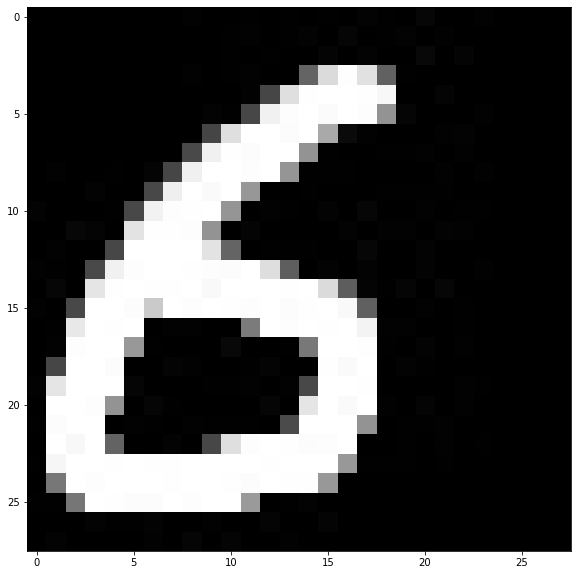

In [1311]:
model.img_pred("test.jpg")

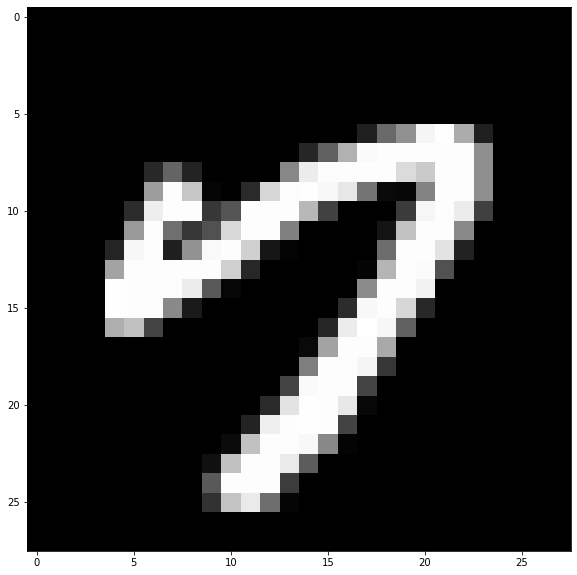

True label 7  pred [7]  prob 0.9839663500005384


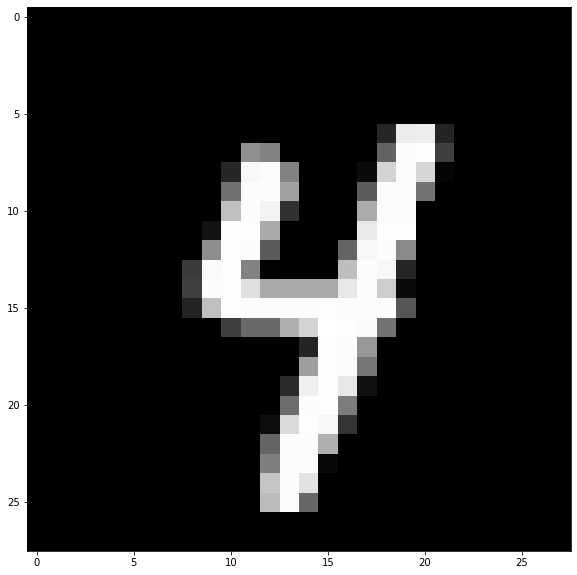

True label 4  pred [4]  prob 0.9833280690604435


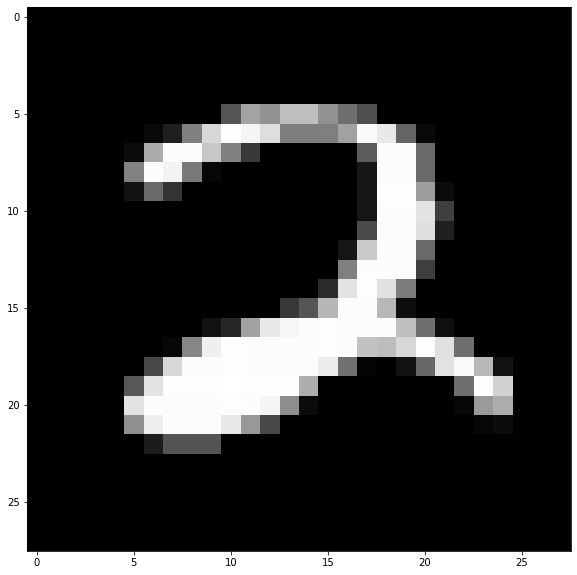

True label 2  pred [2]  prob 0.9999999530028582


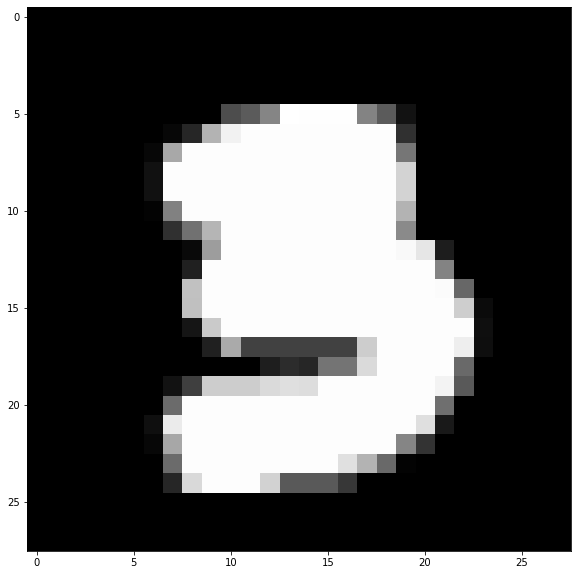

True label 3  pred [3]  prob 0.9771700950093917


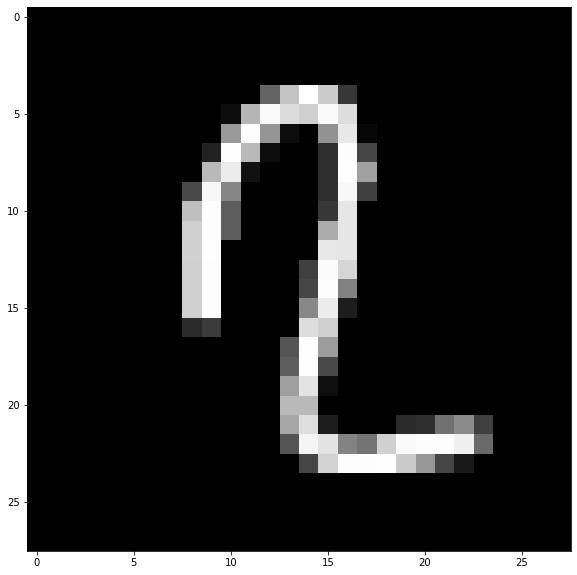

True label 2  pred [2]  prob 0.3895132941634447


In [1312]:
for i in range(5):
    test=np.random.randint(0,X_test.shape[0])
    plt.imshow(X_test[test].reshape(28,28),cmap="gray")
    plt.show()
    pred,prob=model.predict(X_test[test])
    print(f"True label {Y_test[test]}  pred {pred}  prob {prob}")


In [1313]:
model.save("test.sav")

['test.sav']

(array([8], dtype=int64), 0.5282760150807954)

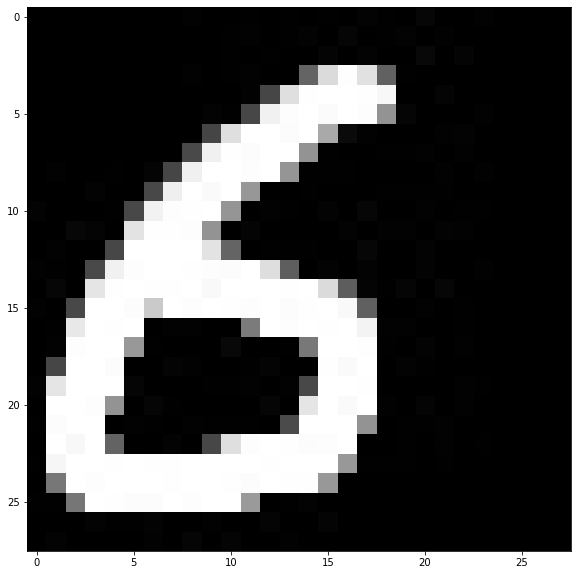

In [1315]:
toto=joblib.load("test.sav")
toto.img_pred("test.jpg")

## Test

In [4]:
import neural_network
X_train = np.load("train-images.npy").reshape(-1,28*28)
Y_train = np.load("train-labels.npy")

X_test = np.load("t10k-images.npy").reshape(-1,28*28)
Y_test = np.load("t10k-labels.npy")

In [5]:
model=neural_network.NN(X_train,X_test,Y_train,Y_test,neurons=512,epochs=200,learning_rate=1e-3,dropout=0.2)
model.fit()

Epoch 0     train_loss : 4.6922     test_loss : 5.1307     train_accuracy : 0.147      test_accuracy : 0.1085   
Epoch 10    train_loss : 1.9123     test_loss : 2.0076     train_accuracy : 0.6122     test_accuracy : 0.7079   
Epoch 20    train_loss : 0.8349     test_loss : 0.6717     train_accuracy : 0.742      test_accuracy : 0.8228   
Epoch 30    train_loss : 0.8067     test_loss : 0.5332     train_accuracy : 0.764      test_accuracy : 0.8656   
Epoch 40    train_loss : 0.5911     test_loss : 0.483      train_accuracy : 0.8268     test_accuracy : 0.8795   
Epoch 50    train_loss : 0.547      test_loss : 0.4883     train_accuracy : 0.8396     test_accuracy : 0.8828   
Epoch 60    train_loss : 0.5265     test_loss : 0.4309     train_accuracy : 0.8491     test_accuracy : 0.8984   
Epoch 70    train_loss : 0.62       test_loss : 0.466      train_accuracy : 0.8206     test_accuracy : 0.8894   
Epoch 80    train_loss : 0.5901     test_loss : 0.4568     train_accuracy : 0.836      test_accu

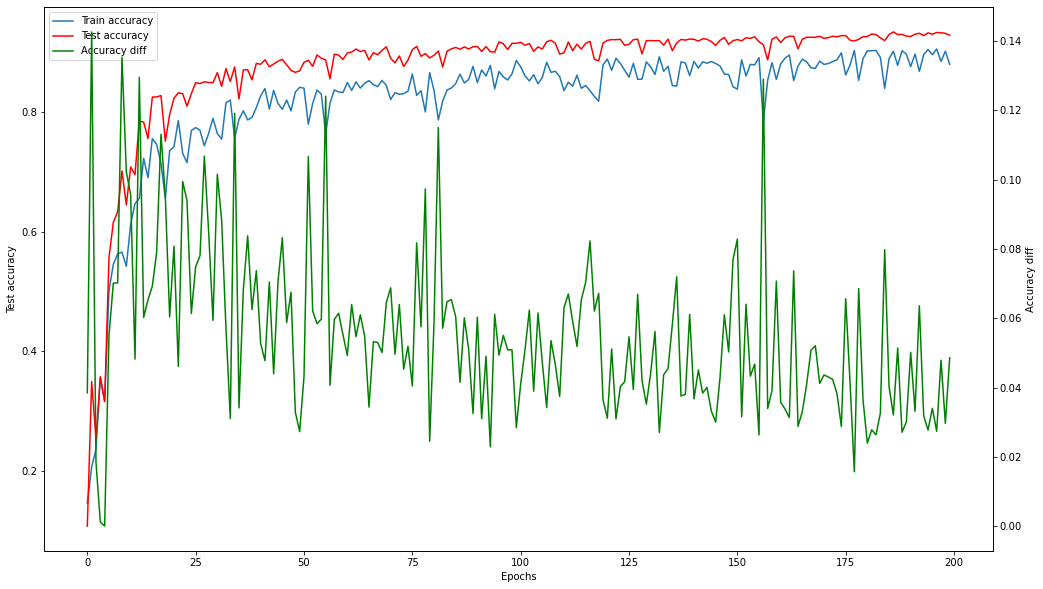

In [6]:
model.accuracy_curve()

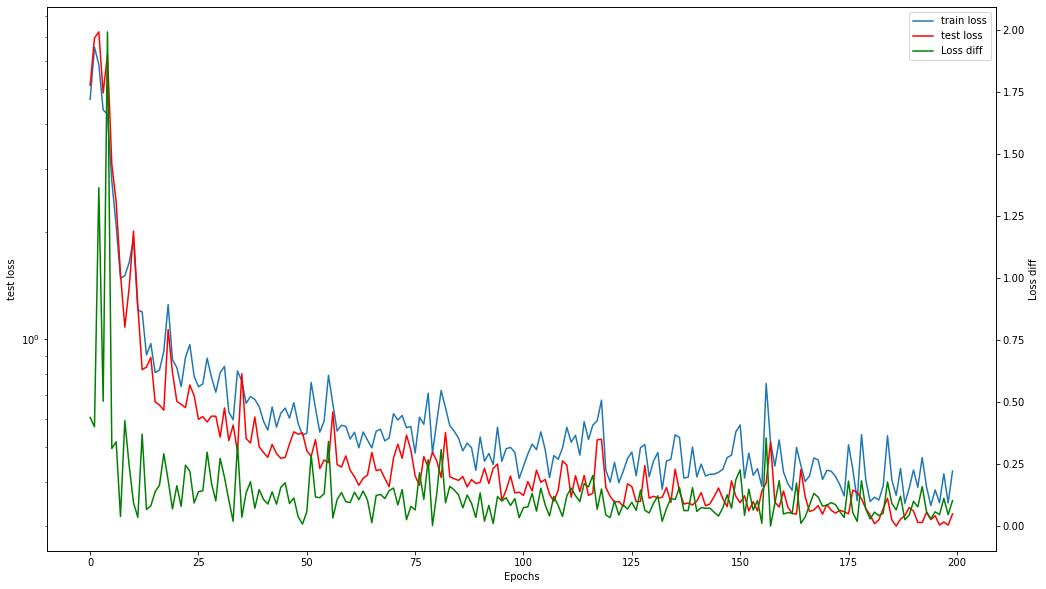

In [7]:
model.loss_curve()

In [8]:
model.save("MNIST_N512_E200.sav")

['MNIST_N512_E200.sav']

(array([2], dtype=int64), 0.9954247460161224)

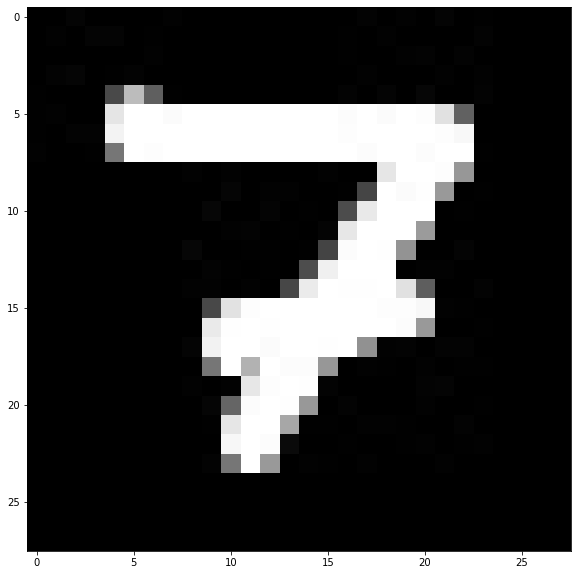

In [10]:
model.img_pred("test.jpg")

-------------------- Loading data --------------------
-------------------- Data loaded --------------------
-------------------- Training model --------------------


Epoch 0     train_loss : 6.1248     test_loss : 6.7356     train_accuracy : 0.0981     test_accuracy : 0.0984   
Epoch 1     train_loss : 7.251      test_loss : 7.6535     train_accuracy : 0.1102     test_accuracy : 0.1367   
Epoch 2     train_loss : 6.5144     test_loss : 5.7002     train_accuracy : 0.2083     test_accuracy : 0.3564   
Epoch 3     train_loss : 6.8994     test_loss : 8.5095     train_accuracy : 0.2485     test_accuracy : 0.2541   
Epoch 4     train_loss : 6.194      test_loss : 6.6968     train_accuracy : 0.3113     test_accuracy : 0.3566   
Epoch 5     train_loss : 4.469      test_loss : 6.023      train_accuracy : 0.4364     test_accuracy : 0.4281   
Epoch 6     train_loss : 2.3653     test_loss : 2.5788     train_accuracy : 0.5084     test_accuracy : 0.5693   
Epoch 7     train_loss : 1.6705     test_loss : 1.4179     train_accuracy : 0.5736     test_accuracy : 0.6346   
Epoch 8     train_loss : 1.3383     test_loss : 0.8411     train_accuracy : 0.581      test_accu

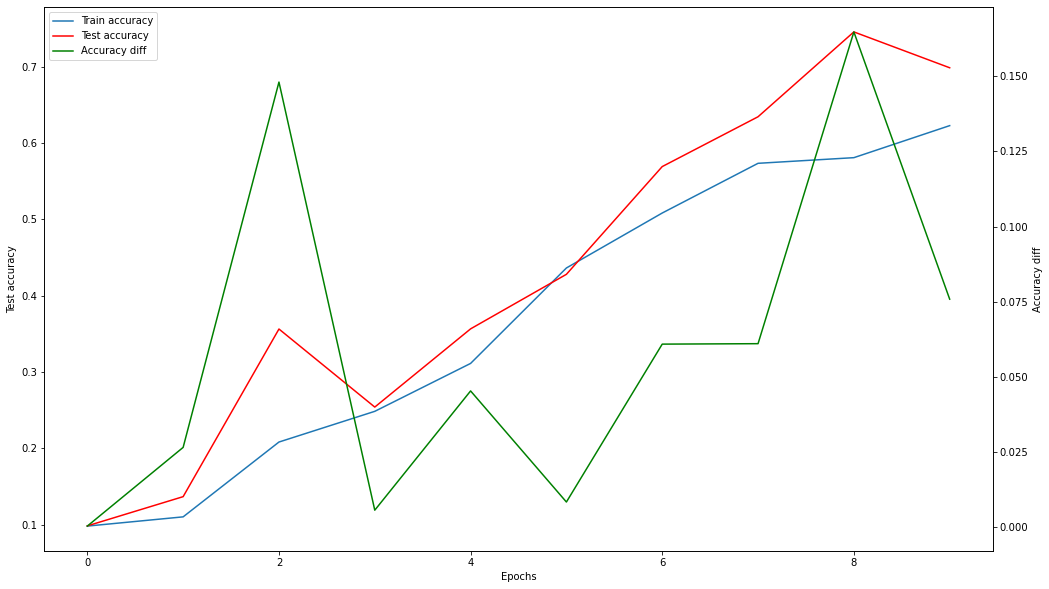

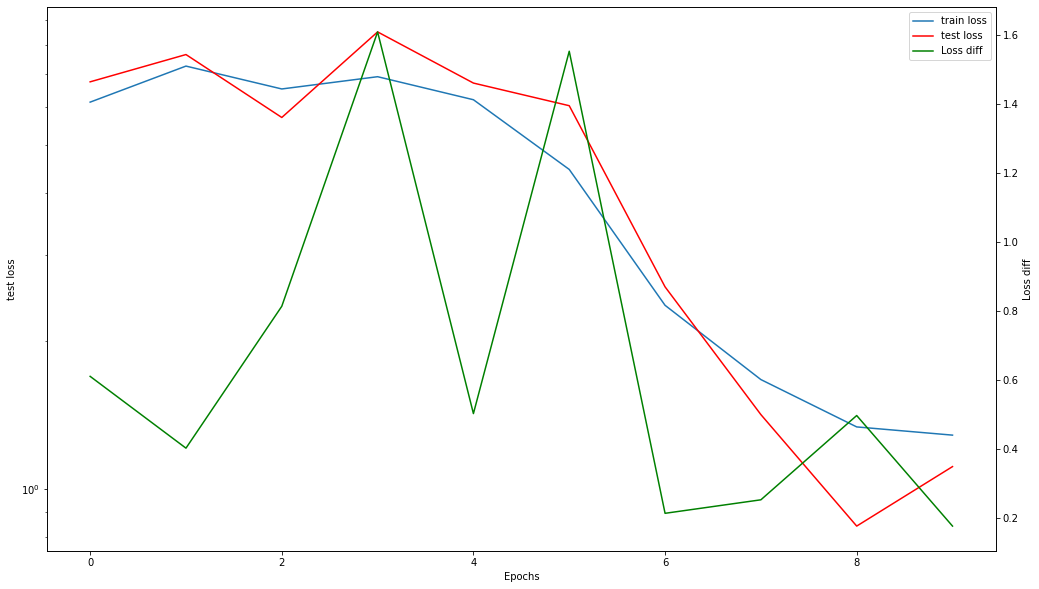

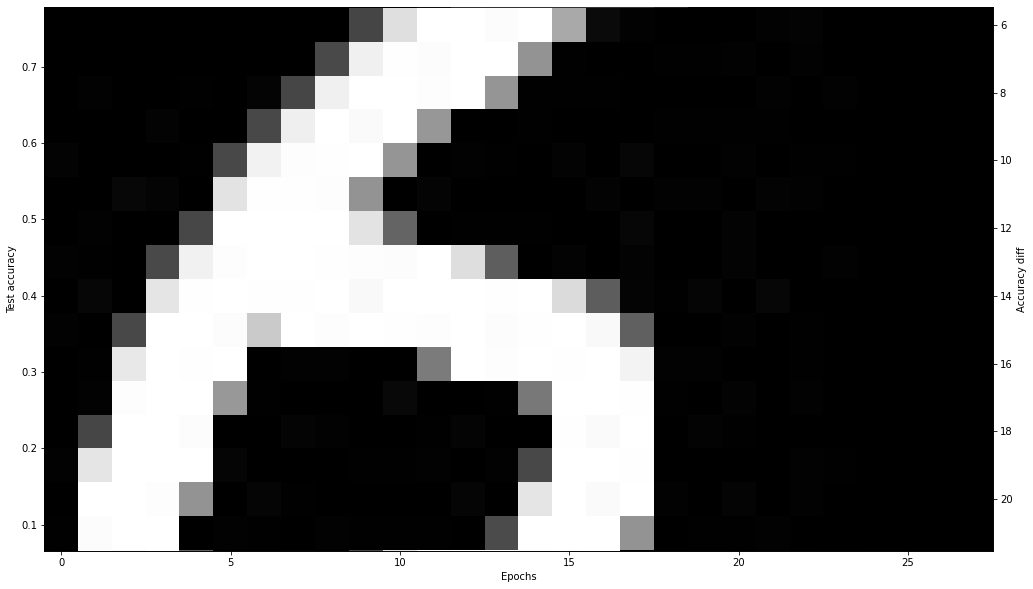

In [1]:
import test
test.run()

## Mini-batch

In [5]:
X_train = np.load("train-images.npy").reshape(-1,28*28)
Y_train = np.load("train-labels.npy")

X_test = np.load("t10k-images.npy").reshape(-1,28*28)
Y_test = np.load("t10k-labels.npy")

In [18]:
def next_batch(X, y, batchSize):
    # loop over our dataset `X` in mini-batches of size `batchSize`
    for i in np.arange(0, X.shape[0], batchSize):
        # yield a tuple of the current batched data and labels
        return (X[i:i + batchSize], y[i:i + batchSize])

In [16]:
batch=next_batch(X_test,Y_test,16)

In [22]:
np.random.randint(0,X_test.shape[0])

2734

In [29]:
batch=np.random.choice(X_test.shape[0],16)

In [30]:
X_test[batch].shape

(16, 784)

In [31]:
batch

array([5869, 8993, 8609, 5550, 8931, 4202, 1816, 1316,  918, 3484, 7975,
       9762, 3727, 6310, 3416, 5622])

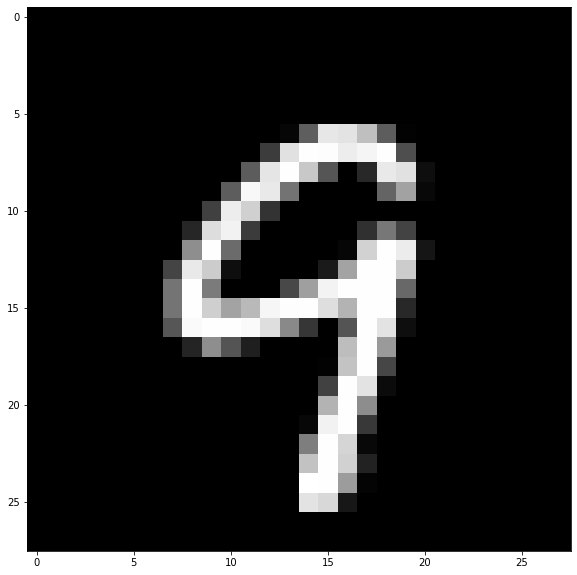

In [35]:
plt.imshow(X_test[batch][0].reshape(28,28),cmap='gray')

In [36]:
Y_test[batch][0]

9

In [3]:
def generate_batch(X,Y,batch_size):
    batch=np.random.choice(X.shape[0],batch_size)
    return X[batch],Y[batch]

In [55]:
x_batch1,y_batch1=generate_batch(X_test,Y_test,16)
x_batch,y_batch=generate_batch(X_test,Y_test,16)

In [57]:
y_batch1==y_batch
x_batch1==x_batch

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [110]:
X_test.shape

(10000, 784)

In [111]:
Y_test.shape

(10000,)

In [118]:
x_batch1,y_batch1=generate_batch(X_test,Y_test,1024)

In [119]:
y_batch1[0]

7

In [59]:
x_batch.sum()

480738

In [108]:
def load_model(x):
    return joblib.load(x)


def relu(x):
    """
    Relu activation function
    return : relu output (max(0,x))
    """
    return np.maximum(0, x)


def feedforward(X, W, b):
    """
    1 feedforward
    return : output layer
    """
    return np.dot(X, W)+b


def get_accuracy(scores, y):
    """
    Compute accuracy after feedforward
    return : accuracy (0 to 1)
    """
    predict_class = np.argmax(scores, axis=1)
    return np.mean(predict_class == y)


def softmax(scores, eps):
    """
    Compute class probabilities by softmax
    return : sofwtmax output (probabilities)
    """
    exp = np.exp(scores)
    probs = exp/np.sum(exp, axis=1, keepdims=True)+eps
    return probs


def cross_entropy(probs, y, num_examples, W1, W2, reg):
    """
    Compute the loss: average cross-entropy loss and regularization
    return : cross_entropy loss
    """
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W1*W1)+0.5*reg*np.sum(W2*W2)
    loss = data_loss+reg_loss
    return loss


def grad(probs, y, num_examples):
    """
    Compute the gradient on scores
    return : dscores
    """
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    return dscores


def backpropagation(hidden_layer, dscores, W2, W, X, reg):
    """
    backpropate the gradient to the parameters
    return : dW,db,dW2,db2
    """
    # first backprop into parameters W2 and b2
    dW2 = feedforward(hidden_layer.T, dscores, b=0)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = feedforward(dscores, W2.T, b=0)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = feedforward(X.T, dhidden, b=0)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # add regularization gradient contribution
    dW2 += reg * W2
    dW += reg * W

    return dW, db, dW2, db2


def updates(W, b, W2, b2, dW, db, dW2, db2, learning_rate):
    """
    updates the weights
    return : W,b,W2,b2
    """
    W += -learning_rate * dW
    b += -learning_rate * db
    W2 += -learning_rate * dW2
    b2 += -learning_rate * db2

    return W, b, W2, b2


def invert(img):
    output = -img+255
    return output


def generate_batch(X, Y, batch_size):
    batch = np.random.choice(X.shape[0], batch_size)
    return X[batch], Y[batch]

def generate_dropout(weights,dropout):
    mask=(np.random.rand(weights.shape[0], weights.shape[1]) > dropout)
    return mask

class NN():
    def __init__(self, X_train, X_test, Y_train, Y_test, neurons, epochs, learning_rate, dropout=2, reg=1e-3, seed=0, batch_size=1024):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.neurons = neurons
        self.input_dim = 28*28
        self.ouput_dim = 10
        self.W = 0.01 * np.random.randn(self.input_dim, self.neurons)
        self.b = np.zeros((1, self.neurons))
        self.W2 = 0.01 * np.random.randn(self.neurons, self.ouput_dim)
        self.b2 = np.zeros((1, self.ouput_dim))
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.dropout = dropout
        self.reg = reg
        self.train_loss = np.zeros(self.epochs)
        self.train_accuracy = np.zeros(self.epochs)
        self.test_loss = np.zeros(self.epochs)
        self.test_accuracy = np.zeros(self.epochs)
        self.num_examples = self.X_train.shape[0]
        self.num_examples_test = self.X_test.shape[0]
        self.eps = 1e-8
        self.seed = seed
        self.batch_size = batch_size

    def predict(self, X):
        """
        Prediction
        return : predicted_class,probability
        """

        hidden_layer = relu(feedforward(X, self.W, self.b))
        scores = softmax(feedforward(hidden_layer, self.W2, self.b2), self.eps)
        predicted_class = np.argmax(scores, axis=1)
        probability = np.max(scores)

        return predicted_class, probability

    def img_pred(self, X):
        img = invert(cv2.imread(X, 0))
    #     img = img/255
        plt.imshow(img, cmap="gray")
        img = img.reshape(28*28)
        return self.predict(img)

    def predict_time(known_epoch, known_min, known_sec, wanted_epoch):
        total_sec = known_sec+known_min*60
        ratio = total_sec/known_epoch
        secondes = wanted_epoch*ratio
        minutes = secondes//60
        secondes = secondes % 60
        return f'{int(minutes)} min and {int(secondes)} sec for {wanted_epoch} epochs'

    def loss_curve(self, return_fig=False, diff=False):
        fig1, ax1=plt.subplots()

        ax1.plot(range(self.epochs), self.train_loss, label="train loss")
        ax1.plot(range(self.epochs), self.test_loss,
                 label="test loss", color='red')


        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Loss')

        ax1.set_yscale('log')
        h1, l1=ax1.get_legend_handles_labels()



        if diff:
            ax2 = ax1.twinx()
            ax2.plot(range(self.epochs), np.abs(self.train_loss-self.test_loss),
                 label="Loss diff", color='green')
            ax2.set_ylabel('Loss diff')
            ax1.legend(h1+h2, l1+l2, loc=0)
            h2, l2=ax2.get_legend_handles_labels()
        else:
            ax1.legend(h1, l1, loc=0)

        if return_fig:
            return fig1
        else:
            return

    def accuracy_curve(self, return_fig=False, diff=False):
        fig1, ax1=plt.subplots()

        ax1.plot(range(self.epochs), self.train_accuracy, label="Train accuracy")
        ax1.plot(range(self.epochs), self.test_accuracy, label="Test accuracy", color='red')

        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Accuracy')


        h1, l1=ax1.get_legend_handles_labels()

        if diff:
            ax2 = ax1.twinx()
            ax2.plot(range(self.epochs), np.abs(self.train_accuracy-self.test_accuracy),label="Accuracy diff", color='green')
            ax2.set_ylabel('Accuracy diff')
            h2, l2=ax2.get_legend_handles_labels()
            ax1.legend(h1+h2, l1+l2, loc=0)
        else:
            ax1.legend(h1, l1, loc=0)

        if return_fig:
            return fig1
        else:
            return

    def save(self, name):
        return joblib.dump(self, name)

    def fit(self):
#         np.random.seed(self.seed)
        for i in tqdm(range(self.epochs)):
            
            if self.batch_size>0:
                # generate batch
                X_batch, Y_batch=generate_batch(self.X_train, self.Y_train, self.batch_size)
                X_test_batch, Y_test_batch=generate_batch(self.X_test, self.Y_test, self.batch_size)
            else:
                X_batch, Y_batch=self.X_train, self.Y_train
                X_test_batch, Y_test_batch=self.X_test, self.Y_test      

            
            # dropout mask
            mask = generate_dropout(self.W,self.dropout)
            mask2 = generate_dropout(self.W2,self.dropout)


            # 1st layer + relu
            hidden_layer=relu(feedforward(X_batch, self.W*mask, self.b))

            # 2nd layer
            scores=feedforward(hidden_layer, self.W2*mask2, self.b2)

            # softmax
            probs=softmax(scores, self.eps)

            # crossentropy loss
            loss=cross_entropy(probs, Y_batch,self.batch_size, self.W, self.W2, self.reg)

            # logging loss
            self.train_loss[i]=loss

            # logging accuracy
            self.train_accuracy[i]=get_accuracy(probs, Y_batch)

            # test set logging
            hidden_layer_test=relu(feedforward(X_test_batch, self.W*mask, self.b))
            probs_test=softmax(feedforward(
                hidden_layer_test, self.W2*mask2, self.b2), self.eps)
            self.test_accuracy[i]=get_accuracy(probs_test, Y_test_batch)

            # probs_test = softmax(scores_test, self.eps)
            loss_test=cross_entropy(
                probs_test, Y_test_batch, self.batch_size, self.W, self.W2, self.reg)
            self.test_loss[i]=loss_test

            # gradient
            dscores=grad(probs, Y_batch, self.batch_size)

            # backpropagation
            dW, db, dW2, db2=backpropagation(
                hidden_layer, dscores, self.W2, self.W, X_batch, self.reg)

            # updates
            self.W, self.b, self.W2, self.b2=updates(
                self.W, self.b, self.W2, self.b2, dW, db, dW2, db2, self.learning_rate)

            if i % (self.epochs/20) == 0:
                print(
                    f"Epoch {i: <4}  train_loss : {round(self.train_loss[i],4): <9}  test_loss : {round(self.test_loss[i],4): <9}  train_accuracy : {round(self.train_accuracy[i],4): <9}  test_accuracy : {round(self.test_accuracy[i],4): <9}")

In [113]:
model=NN(X_train,X_test,Y_train,Y_test,neurons=256,epochs=300,learning_rate=1e-3,dropout=0,batch_size=2048)

In [114]:
model.fit()

Epoch 0     train_loss : 3.9421     test_loss : 4.0289     train_accuracy : 0.1323     test_accuracy : 0.1382   
Epoch 15    train_loss : 0.6064     test_loss : 0.6024     train_accuracy : 0.8018     test_accuracy : 0.8154   
Epoch 30    train_loss : 0.4638     test_loss : 0.4681     train_accuracy : 0.8638     test_accuracy : 0.8638   
Epoch 45    train_loss : 0.4431     test_loss : 0.4118     train_accuracy : 0.8794     test_accuracy : 0.8828   
Epoch 60    train_loss : 0.3895     test_loss : 0.3594     train_accuracy : 0.8804     test_accuracy : 0.8979   
Epoch 75    train_loss : 0.3503     test_loss : 0.3151     train_accuracy : 0.8994     test_accuracy : 0.9111   
Epoch 90    train_loss : 0.3322     test_loss : 0.3211     train_accuracy : 0.9058     test_accuracy : 0.9155   
Epoch 105   train_loss : 0.2987     test_loss : 0.2829     train_accuracy : 0.915      test_accuracy : 0.9185   
Epoch 120   train_loss : 0.3129     test_loss : 0.2913     train_accuracy : 0.9062     test_accu

NameError: name 'Y_batch' is not defined

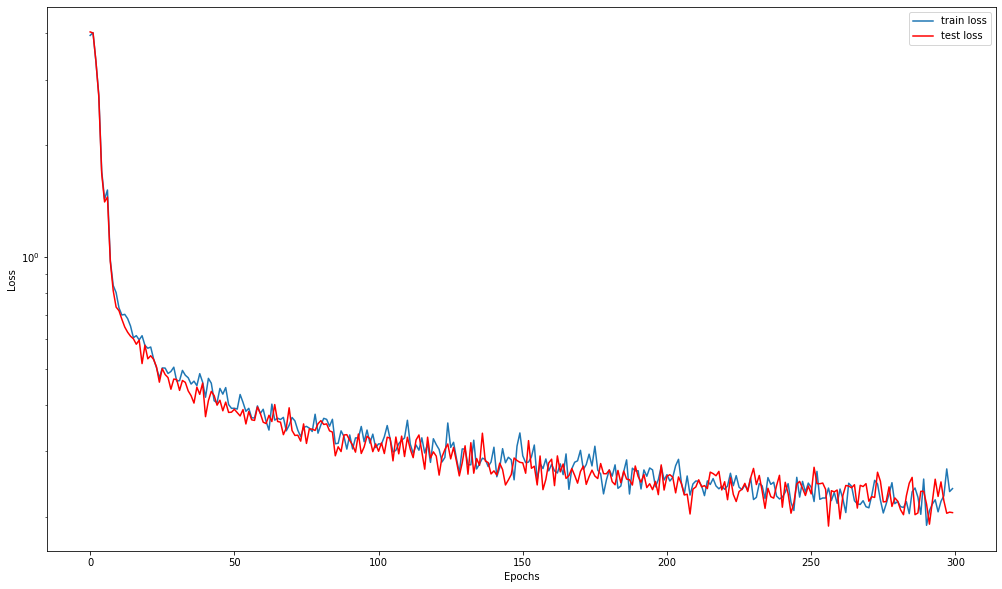

In [115]:
model.loss_curve()

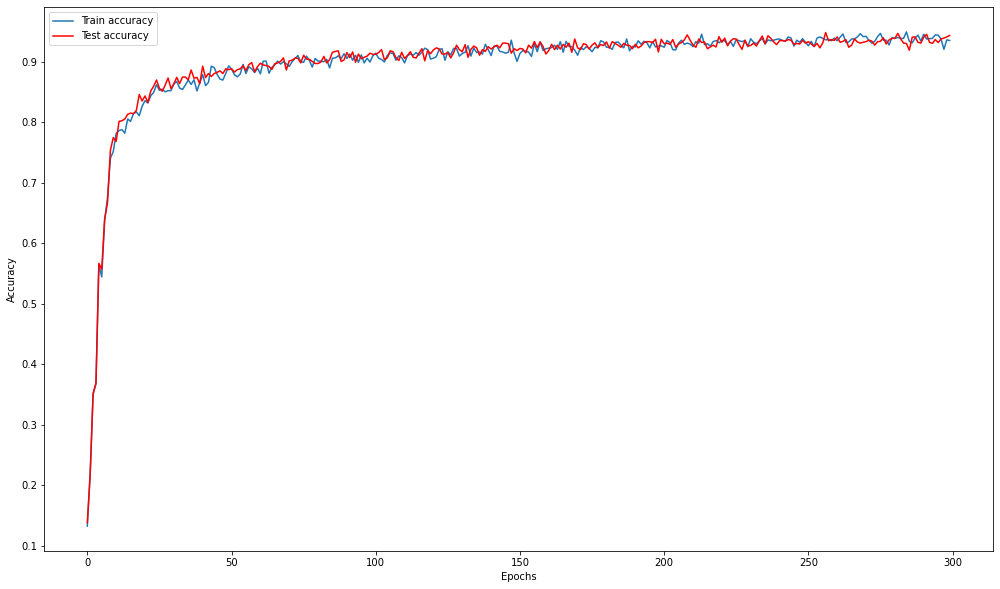

In [116]:
model.accuracy_curve()

## No regularization no dropout

In [102]:
def load_model(x):
    """
    Charge un model sauvegarder au format .sav (joblib)
    """
    return joblib.load(x)


def relu(x):
    """
    Relu activation function
    return : relu output (max(0,x))
    """
    return np.maximum(0, x)


def feedforward(X, W, b):
    """
    1 feedforward
    return : output layer
    """
    return np.dot(X, W)+b


def get_accuracy(probs, y):
    """
    Compute accuracy after feedforward
    Do a comparaison between the predicted value and the true value
    return : accuracy (from 0 to 1)
    """
    predict_class = np.argmax(probs, axis=1)
    return np.mean(predict_class == y)


def softmax(scores, eps):
    """
    Compute class probabilities by softmax
    return : sofwtmax output (probabilities)
    """
    exp = np.exp(scores)
    probs = exp/np.sum(exp, axis=1, keepdims=True)+eps
    return probs


def cross_entropy(probs, y, num_examples):
    """
    Compute the loss: average cross-entropy loss and regularization
    return : cross_entropy loss
    """
    correct_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(correct_logprobs)/num_examples

    return data_loss


def grad(probs, y, num_examples):
    """
    Compute the gradient on probs
    return : dscores
    """
    dscores = probs
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    return dscores


def backpropagation(hidden_layer, dscores, W2, W, X):
    """
    backpropate the gradient to the parameters
    return : dW,db,dW2,db2
    """
    # first backprop into parameters W2 and b2
    dW2 = feedforward(hidden_layer.T, dscores, b=0)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # next backprop into hidden layer
    dhidden = feedforward(dscores, W2.T, b=0)
    # backprop the ReLU non-linearity
    dhidden[hidden_layer <= 0] = 0
    # finally into W,b
    dW = feedforward(X.T, dhidden, b=0)
    db = np.sum(dhidden, axis=0, keepdims=True)

    return dW, db, dW2, db2


def updates(W, b, W2, b2, dW, db, dW2, db2, learning_rate):
    """
    updates the weights
    return : W,b,W2,b2
    """
    W += -learning_rate * dW
    b += -learning_rate * db
    W2 += -learning_rate * dW2
    b2 += -learning_rate * db2

    return W, b, W2, b2


def invert(img):
    """
    Invert an 8 bit image from Microsoft Paint ()
    """
    output = -img+255
    return output


def generate_batch(X, Y, batch_size):
    """
    Generate a batch for X and Y of corresponding indexes
    """
    batch = np.random.choice(X.shape[0], batch_size)
    return X[batch], Y[batch]


class NN():
    def __init__(self, X_train, X_test, Y_train, Y_test, neurons, epochs, learning_rate, seed=0, batch_size=1024):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.neurons = neurons
        self.input_dim = 28*28
        self.ouput_dim = 10
        self.W = 0.01 * np.random.randn(self.input_dim, self.neurons)
        self.b = np.zeros((1, self.neurons))
        self.W2 = 0.01 * np.random.randn(self.neurons, self.ouput_dim)
        self.b2 = np.zeros((1, self.ouput_dim))
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.train_loss = np.zeros(self.epochs)
        self.train_accuracy = np.zeros(self.epochs)
        self.test_loss = np.zeros(self.epochs)
        self.test_accuracy = np.zeros(self.epochs)
        self.num_examples = self.X_train.shape[0]
        self.num_examples_test = self.X_test.shape[0]
        self.eps = 1e-8
        self.seed = seed
        self.batch_size = batch_size

    def predict(self, X):
        """
        Prediction
        return : predicted_class,probability
        """
        hidden_layer = relu(feedforward(X, self.W, self.b))
        scores = softmax(feedforward(hidden_layer, self.W2, self.b2), self.eps)
        predicted_class = np.argmax(scores, axis=1)
        probability = np.max(scores)
        return predicted_class, probability

    def img_pred(self, X):
        """
        Predict the class and probability of an image X
        return : image,predicted_class,probability
        """
        img = invert(cv2.imread(X, 0))
        plt.imshow(img, cmap="gray")
        img = img.reshape(28*28)
        return self.predict(img)

    def predict_time(known_epoch, known_min, known_sec, wanted_epoch):
        """
        Predict the time a model will take to train for Y epochs based on another model with Y epochs 
        and same hyperparamters
        """
        total_sec = known_sec+known_min*60
        ratio = total_sec/known_epoch
        secondes = wanted_epoch*ratio
        minutes = secondes//60
        secondes = secondes % 60
        return f'{int(minutes)} min and {int(secondes)} sec for {wanted_epoch} epochs'

    def loss_curve(self, return_fig=False, diff=False):
        """
        Plot the loss curve over the epochs.
        Can show the difference between train and test
        """
        fig1, ax1 = plt.subplots()
        ax1.plot(range(self.epochs),
                 self.train_loss,
                 label="train loss")

        ax1.plot(range(self.epochs),
                 self.test_loss,
                 label="test loss",
                 color='red')

        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Loss')
        ax1.set_yscale('log')
        h1, l1 = ax1.get_legend_handles_labels()

        if diff:
            ax2 = ax1.twinx()
            ax2.plot(range(self.epochs),
                     np.abs(self.train_loss-self.test_loss),
                     label="Loss diff", color='green')

            ax2.set_ylabel('Loss diff')
            ax1.legend(h1+h2, l1+l2, loc=0)
            h2, l2 = ax2.get_legend_handles_labels()
        else:
            ax1.legend(h1, l1, loc=0)

        if return_fig:
            return fig1
        else:
            return

    def accuracy_curve(self, return_fig=False, diff=False):
        """
        Plot the accuracy curve over the epochs.
        Can show the difference between train and test
        """
        fig1, ax1 = plt.subplots()
        ax1.plot(range(self.epochs),
                 self.train_accuracy,
                 label="Train accuracy")

        ax1.plot(range(self.epochs),
                 self.test_accuracy,
                 label="Test accuracy",
                 color='red')

        ax1.set_xlabel('Epochs')
        ax1.set_ylabel('Accuracy')
        h1, l1 = ax1.get_legend_handles_labels()

        if diff:
            ax2 = ax1.twinx()
            ax2.plot(range(self.epochs),
                     np.abs(self.train_accuracy - self.test_accuracy),
                     label="Accuracy diff", color='green')

            ax2.set_ylabel('Accuracy diff')
            h2, l2 = ax2.get_legend_handles_labels()
            ax1.legend(h1+h2, l1+l2, loc=0)
        else:
            ax1.legend(h1, l1, loc=0)

        if return_fig:
            return fig1
        else:
            return

    def save(self, name):
        """
        Save the current model as a .sav file (joblib)
        """
        return joblib.dump(self, name)

    def score(self, X, Y):
        """
        Get the accuracy of the model on a new dataset
        return : accuracy (from 0 to 1)
        """
        predict_class, _ = self.predict(X)
        accuracy = np.mean(predict_class == Y)
        return accuracy

    def fit(self):
        """
        Training process
        """
        for i in tqdm(range(self.epochs)):

            X_batch, Y_batch = generate_batch(self.X_train,
                                              self.Y_train,
                                              self.batch_size)

            X_test_batch, Y_test_batch = generate_batch(self.X_test,
                                                        self.Y_test,
                                                        self.batch_size)

            # 1st layer + relu
            hidden_layer = relu(feedforward(X_batch, self.W, self.b))

            # 2nd layer
            scores = feedforward(hidden_layer, self.W2, self.b2)

            # softmax
            probs = softmax(scores, self.eps)

            # crossentropy loss
            loss = cross_entropy(probs, Y_batch, self.batch_size)

            # logging loss
            self.train_loss[i] = loss

            # logging accuracy
            self.train_accuracy[i] = get_accuracy(probs, Y_batch)

            # test set logging
            hidden_layer_test = relu(feedforward(X_test_batch, self.W, self.b))
            scores_test = feedforward(hidden_layer_test, self.W2, self.b2)
            probs_test = softmax(scores_test, self.eps)
            loss_test = cross_entropy(probs_test,
                                      Y_test_batch,
                                      self.batch_size)

            self.test_accuracy[i] = get_accuracy(probs_test, Y_test_batch)
            self.test_loss[i] = loss_test

            # gradient
            dscores = grad(probs, Y_batch, self.batch_size)

            # backpropagation
            dW, db, dW2, db2 = backpropagation(hidden_layer,
                                               dscores,
                                               self.W2,
                                               self.W,
                                               X_batch)

            # updates
            self.W, self.b, self.W2, self.b2 = updates(self.W,
                                                       self.b,
                                                       self.W2,
                                                       self.b2,
                                                       dW,
                                                       db,
                                                       dW2,
                                                       db2,
                                                       self.learning_rate)

            if i % (self.epochs/20) == 0:
                print(
                    f"Epoch {i: <4}  train_loss : {round(self.train_loss[i],4): <9}  test_loss : {round(self.test_loss[i],4): <9}  train_accuracy : {round(self.train_accuracy[i],4): <9}  test_accuracy : {round(self.test_accuracy[i],4): <9}")

In [125]:
os.chdir(r"D:\Users\Premhx\OneDrive - ENISE\Master Spé ValDoM\Cours\Analyse Matricielle et Optimisation\MNIST")

In [149]:
from sklearn.model_selection import train_test_split
X_train = np.load("train-images.npy").reshape(-1,28*28)
Y_train = np.load("train-labels.npy")

X_test = np.load("t10k-images.npy").reshape(-1,28*28)
Y_test = np.load("t10k-labels.npy")

X_test,X_valid,Y_test,Y_valid=train_test_split(X_test,Y_test,test_size=0.1)

model=NN(X_train,X_test,Y_train,Y_test,neurons=256,epochs=300,learning_rate=1e-3,batch_size=4096)

In [150]:
model.fit()

Epoch 0     train_loss : 5.1825     test_loss : 5.0611     train_accuracy : 0.0876     test_accuracy : 0.0962   
Epoch 15    train_loss : 0.6381     test_loss : 0.6072     train_accuracy : 0.8027     test_accuracy : 0.8093   
Epoch 30    train_loss : 0.487      test_loss : 0.4744     train_accuracy : 0.8547     test_accuracy : 0.8665   
Epoch 45    train_loss : 0.4269     test_loss : 0.3928     train_accuracy : 0.8733     test_accuracy : 0.8845   
Epoch 60    train_loss : 0.3669     test_loss : 0.3495     train_accuracy : 0.8879     test_accuracy : 0.8989   
Epoch 75    train_loss : 0.3626     test_loss : 0.3211     train_accuracy : 0.8979     test_accuracy : 0.9058   
Epoch 90    train_loss : 0.3133     test_loss : 0.3082     train_accuracy : 0.9075     test_accuracy : 0.9114   
Epoch 105   train_loss : 0.3125     test_loss : 0.3085     train_accuracy : 0.9141     test_accuracy : 0.9109   
Epoch 120   train_loss : 0.3035     test_loss : 0.3026     train_accuracy : 0.9111     test_accu

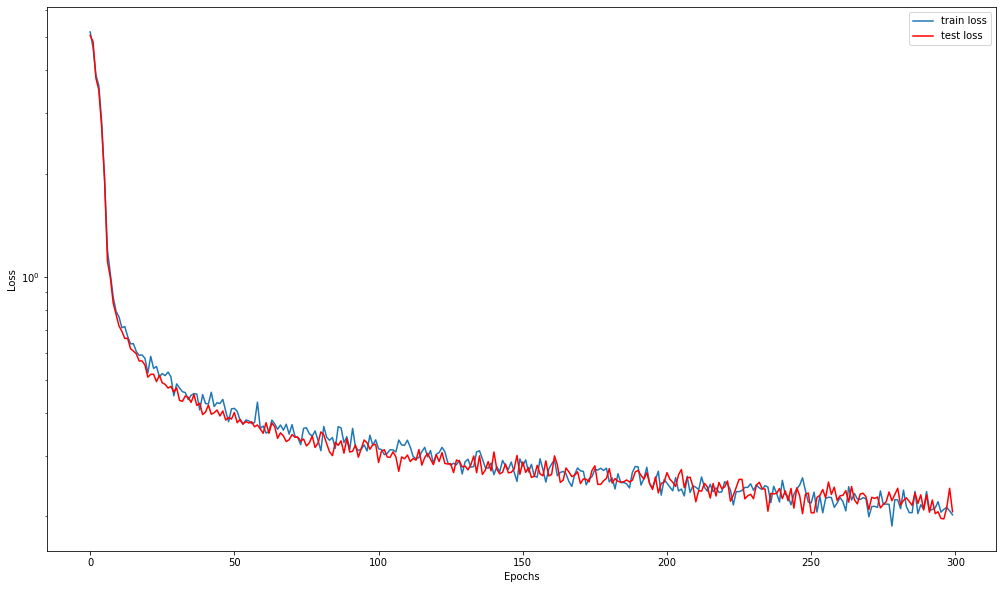

In [151]:
model.loss_curve()

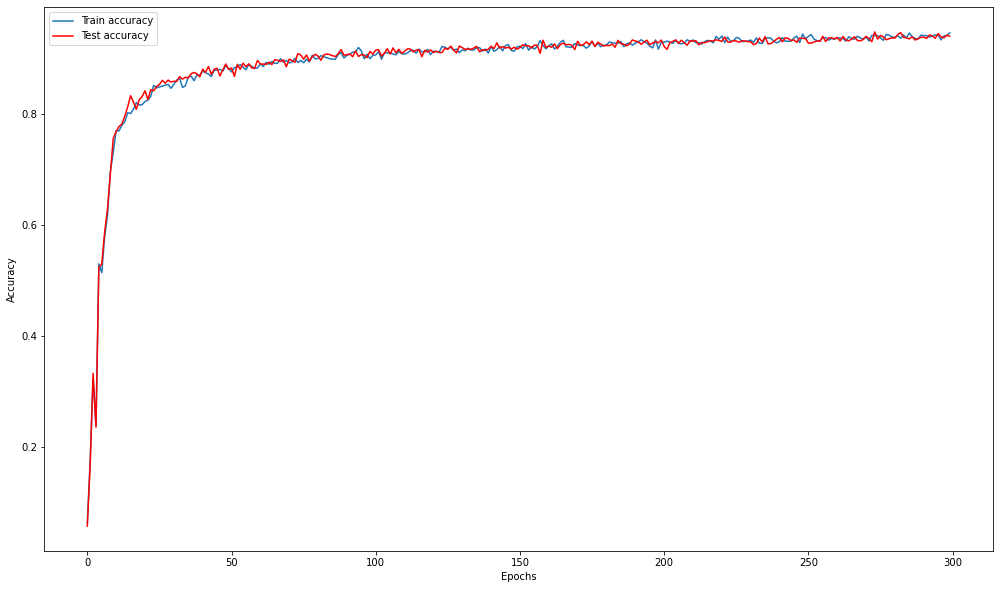

In [131]:
model.accuracy_curve()

(array([4], dtype=int64), 0.968354667507694)

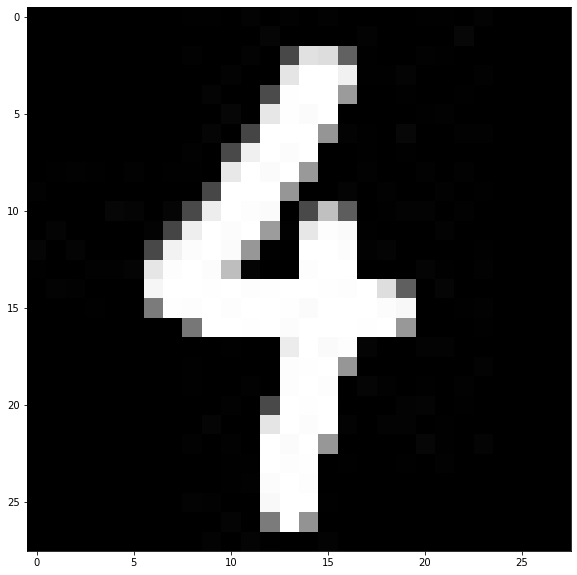

In [161]:
model.img_pred("test.jpg")

In [152]:
model.score(X_valid,Y_valid)

0.929

In [254]:
import simple_neural_network as snn

In [255]:
model=snn.NN(X_train,X_test,Y_train,Y_test,neurons=256,epochs=1200,learning_rate=1e-3,batch_size=512)

Epoch 0     train_loss : 5.851      test_loss : 5.8476     train_accuracy : 0.0547     test_accuracy : 0.0742   
Epoch 60    train_loss : 0.4019     test_loss : 0.4174     train_accuracy : 0.8809     test_accuracy : 0.8828   
Epoch 120   train_loss : 0.277      test_loss : 0.2834     train_accuracy : 0.9102     test_accuracy : 0.918    
Epoch 180   train_loss : 0.2886     test_loss : 0.2394     train_accuracy : 0.9277     test_accuracy : 0.9355   
Epoch 240   train_loss : 0.2774     test_loss : 0.1862     train_accuracy : 0.916      test_accuracy : 0.9434   
Epoch 300   train_loss : 0.2208     test_loss : 0.2915     train_accuracy : 0.9434     test_accuracy : 0.9043   
Epoch 360   train_loss : 0.2075     test_loss : 0.1692     train_accuracy : 0.9355     test_accuracy : 0.9473   
Epoch 420   train_loss : 0.1724     test_loss : 0.1746     train_accuracy : 0.9492     test_accuracy : 0.9473   
Epoch 480   train_loss : 0.142      test_loss : 0.1639     train_accuracy : 0.9629     test_accu

0.954

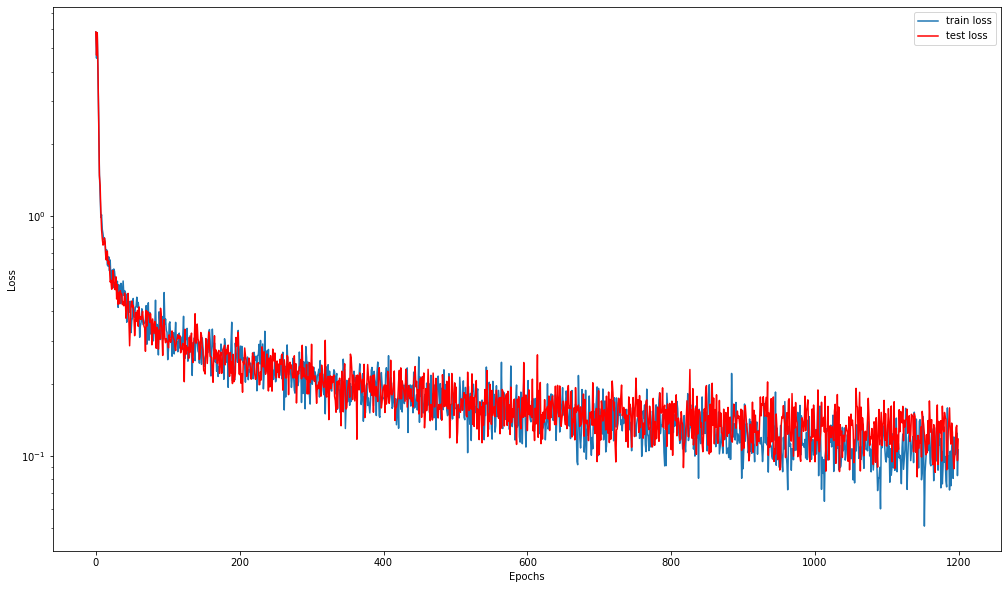

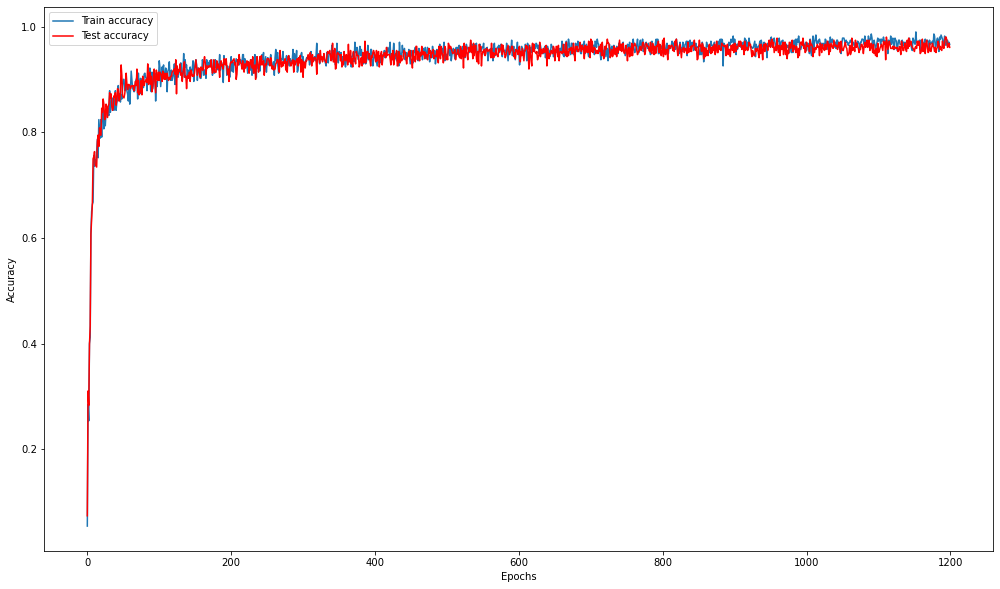

In [237]:
model.fit()
model.loss_curve()
model.accuracy_curve()
model.score(X_valid,Y_valid)

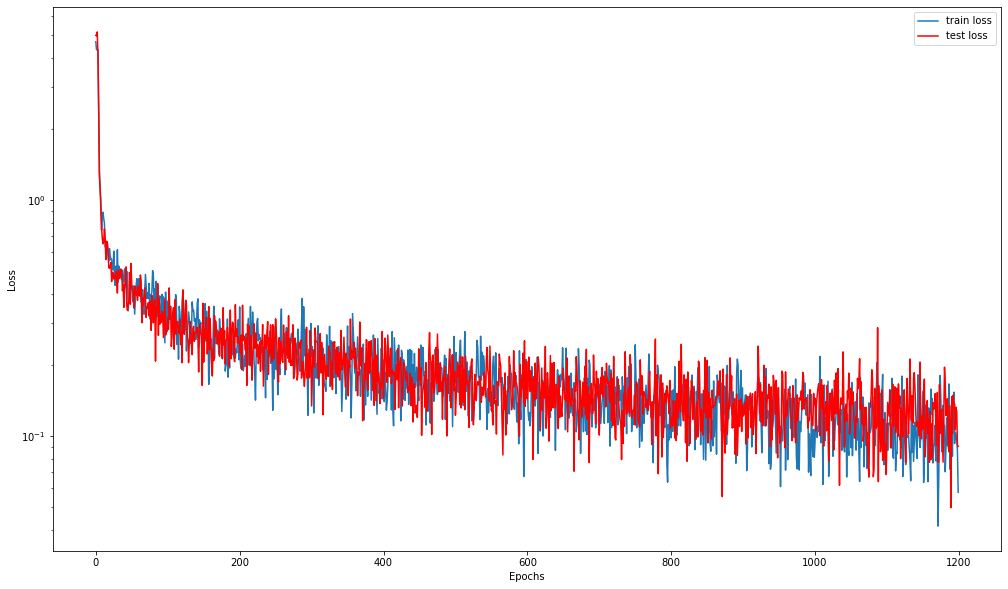

In [233]:
model.loss_curve()

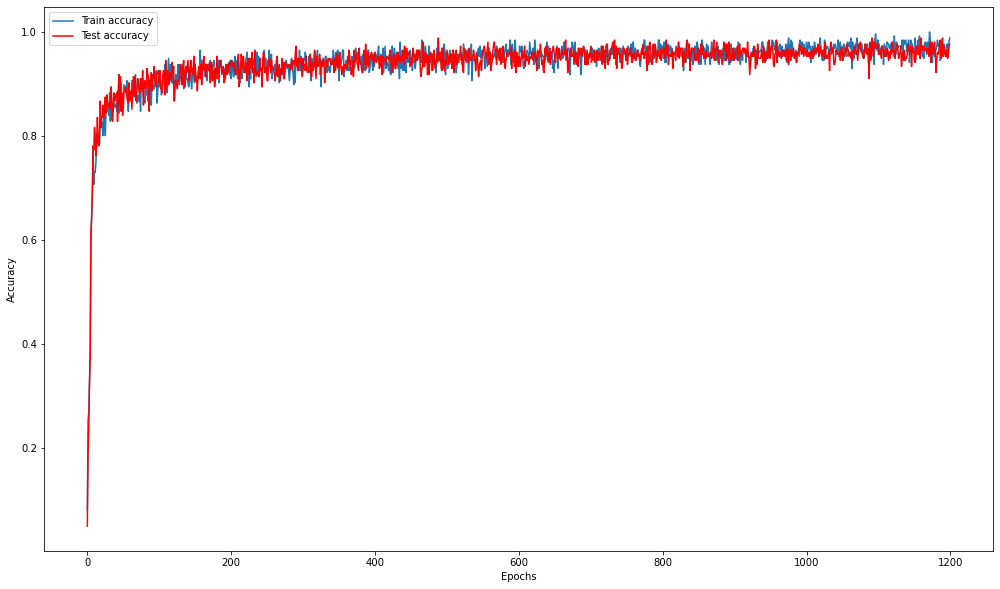

In [234]:
model.accuracy_curve()

In [235]:
model.score(X_valid,Y_valid)

0.952

In [243]:
np.max(model.test_accuracy)

0.98046875

In [244]:
img=cv2.imread("test.jpg",0)

In [245]:
img.shape

(28, 28)

In [247]:
img.max()

255

In [251]:
np.unique(Y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 881, 1026,  924,  914,  891,  780,  863,  939,  871,  911],
       dtype=int64))

# Test MNIST Fashion

In [112]:
os.chdir(r"D:\Users\Premhx\OneDrive - ENISE\Master Spé ValDoM\Cours\Analyse Matricielle et Optimisation\MNIST\Fashion")

In [116]:
from sklearn.model_selection import train_test_split
X_train = np.load("train-images-idx3-ubyte.npy").reshape(-1,28*28)
Y_train = np.load("train-labels-idx1-ubyte.npy")

X_test = np.load("t10k-images-idx3-ubyte.npy").reshape(-1,28*28)
Y_test = np.load("t10k-labels-idx1-ubyte.npy")

X_test,X_valid,Y_test,Y_valid=train_test_split(X_test,Y_test,test_size=0.1)


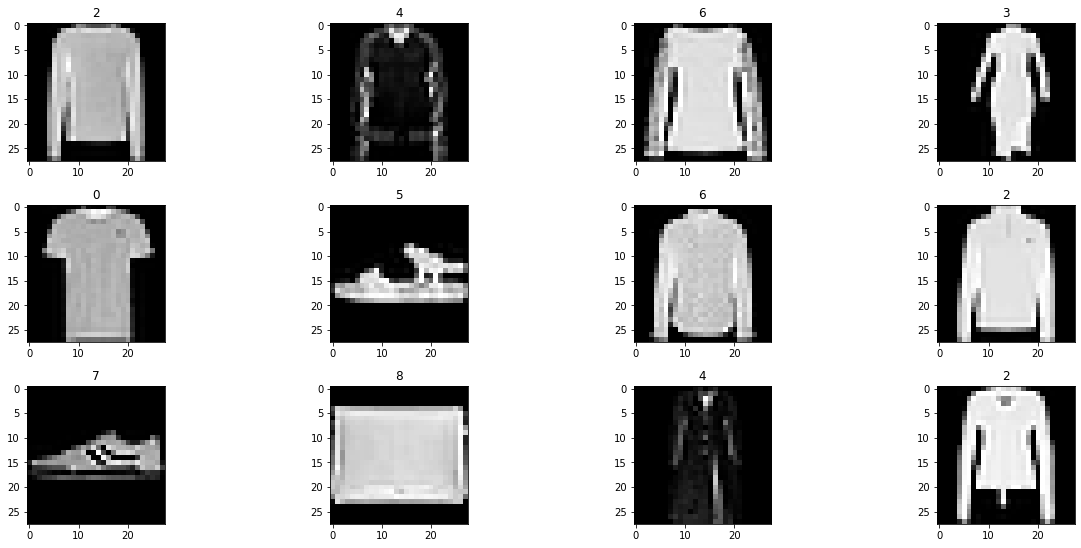

In [123]:
# random check with nine training examples
np.random.seed(0)
indices = list(np.random.randint(X_train.shape[0], size=12))
for i in range(12):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[indices[i]].reshape(28, 28),
               cmap='gray', interpolation='none')
    plt.title(Y_train[indices[i]])
    plt.tight_layout()

In [119]:
model=NN(X_train,X_test,Y_train,Y_test,neurons=256,epochs=300,learning_rate=1e-3,batch_size=2048)
model.fit()

Epoch 0     train_loss : 6.6077     test_loss : 6.4321     train_accuracy : 0.0874     test_accuracy : 0.0835   
Epoch 15    train_loss : 0.8961     test_loss : 0.8927     train_accuracy : 0.6821     test_accuracy : 0.6768   
Epoch 30    train_loss : 0.6867     test_loss : 0.7235     train_accuracy : 0.7495     test_accuracy : 0.7368   
Epoch 45    train_loss : 0.7151     test_loss : 0.7092     train_accuracy : 0.7217     test_accuracy : 0.7329   
Epoch 60    train_loss : 0.6124     test_loss : 0.6714     train_accuracy : 0.7725     test_accuracy : 0.7627   
Epoch 75    train_loss : 0.662      test_loss : 0.7068     train_accuracy : 0.7578     test_accuracy : 0.752    
Epoch 90    train_loss : 0.5496     test_loss : 0.5905     train_accuracy : 0.7979     test_accuracy : 0.791    
Epoch 105   train_loss : 0.5572     test_loss : 0.6101     train_accuracy : 0.8047     test_accuracy : 0.7847   
Epoch 120   train_loss : 0.5257     test_loss : 0.5952     train_accuracy : 0.8184     test_accu

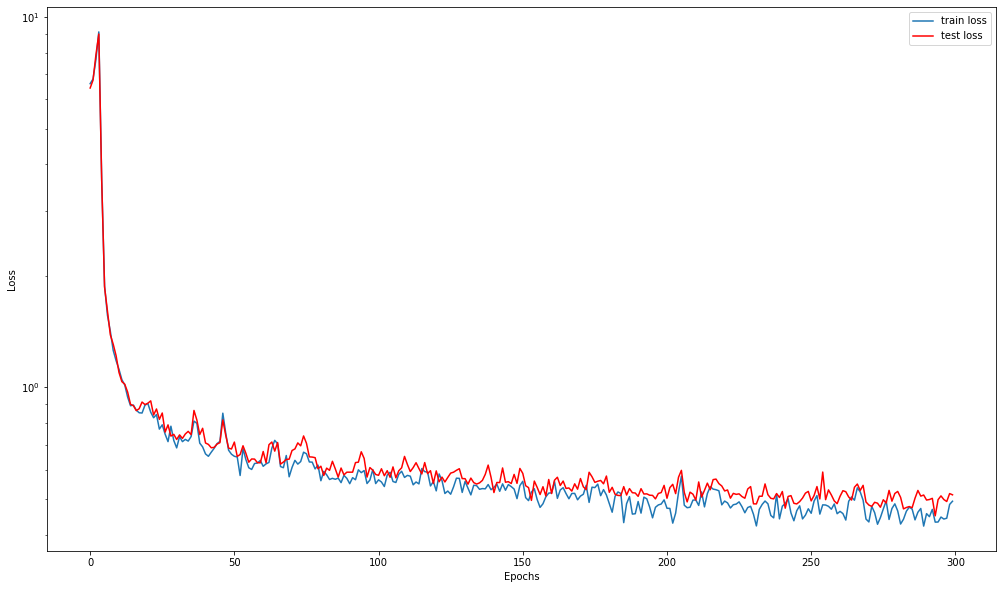

In [120]:
model.loss_curve()

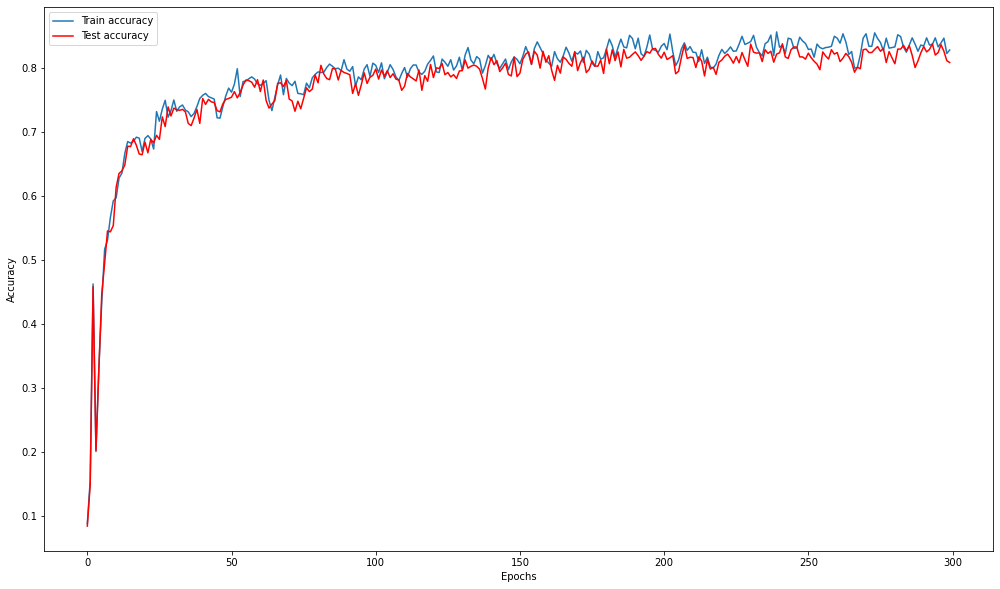

In [121]:
model.accuracy_curve()

In [122]:
model.score(X_valid,Y_valid)

0.824

In [148]:
# génération de poids 

np.random.seed(10)
print(np.random.randint(0,10,(3,3))) #W1
print(np.random.randint(0,10,(3,3))) #W2


#entraiment 

zef zef 



[[9 4 0]
 [1 9 0]
 [1 8 9]]
[[0 8 6]
 [4 3 0]
 [4 6 8]]
